In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests
from bs4 import BeautifulSoup

In [3]:
#Download/scrape the webpage.Disguise using 'headers' to prevent error 403
Data= requests.get("https://www.propertypro.ng/property-for-rent/in/lagos/surulere",headers={'User-Agent':'Google Chrome'})
HousingData = BeautifulSoup(Data.content, 'html.parser')
print(HousingData.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <title>
   Property &amp; Houses for rent in  Surulere  Lagos   (672 listings) | PropertyPro.ng
  </title>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link href="/assets/image/42484569b600758112d45bad3d876f78-favicon.ico" rel="icon" type="image/ico"/>
  <meta content="Real Estate to let in Surulere Lagos Nigeria, Property &amp; Houses for rent in  Surulere  Lagos Nigeria" name="description"/>
  <meta content="Real Estate for  let in Surulere Lagos Nigeria,  Property &amp; Houses for rent Real Estate to let in Nigeria, Property &amp; Houses For rent in Surulere Lagos Nigeria,  Surulere  Lagos Nigeria, Surulere Lagos Nigeria Flats, houses, Apartments, land, commercial property, office space, self contain" name="keywords"/>
  <meta content=" Property &amp; Houses for rent in  Surulere  Lagos  " property="og:title"/>
  <meta content="Real Estate to let in Surulere Lagos Nigeria, Property &am

In [4]:
#Check if the data was parsed successfully
Data

<Response [200]>

In [5]:
[type(item) for item in list(HousingData.children)]

[bs4.element.Doctype, bs4.element.NavigableString, bs4.element.Tag]

In [6]:
#remove all last links in the <span> and <h3> tags. Also, all adverts and sponsored links
last_links = HousingData.find(class_= 'neighbourhood-guid margin-b-30')
last_links.decompose()

#last_links1 = HousingData.find(class_= 'single-servicepage margin-b-30')
#last_links1.decompose()

last_links2 = HousingData.find(class_= 'single-room-sale listings-property sponsored-listing')
last_links2.decompose()

last_links3 = HousingData.find(class_= 'text-center')
last_links3.decompose()

last_link4 = HousingData.find(class_='pagination-area')
last_link4.decompose()

#Pull all text from the room sale area div
my_interest = HousingData.find(class_='room-sale-area')

#Pull text from all instances of <h4> tag within room sale area div
house_address = my_interest.find_all('h4')

#Pull text from all instances of <span> tag within room sale area div
features = my_interest.find_all('span')

#Create for loop to print out all house_address and features
for location in house_address:
 print(location.prettify())
for feature in features:
 print(feature.prettify())


<h4>
 <img alt="icon" src="/assets/assets/img/resultpage/a6b70a0c1c4423f60780bdda189b91e3-location.svg" title="icon"/>
 Aguda Surulere Lagos
</h4>

<h4>
 Premium
</h4>

<h4>
 <img alt="icon" src="/assets/assets/img/resultpage/a6b70a0c1c4423f60780bdda189b91e3-location.svg" title="icon"/>
 Aguda Surulere Lagos
</h4>

<h4>
 Premium
</h4>

<h4>
 <img alt="icon" src="/assets/assets/img/resultpage/a6b70a0c1c4423f60780bdda189b91e3-location.svg" title="icon"/>
 Aguda Surulere Lagos
</h4>

<h4>
 Premium
</h4>

<h4>
 <img alt="icon" src="/assets/assets/img/resultpage/a6b70a0c1c4423f60780bdda189b91e3-location.svg" title="icon"/>
 babs animashun Bode Thomas Surulere Lagos
</h4>

<h4>
 Premium
</h4>

<h4>
 <img alt="icon" src="/assets/assets/img/resultpage/a6b70a0c1c4423f60780bdda189b91e3-location.svg" title="icon"/>
 agbonyin Adelabu Surulere Lagos
</h4>

<h4>
 Premium
</h4>

<h4>
 <img alt="icon" src="/assets/assets/img/resultpage/a6b70a0c1c4423f60780bdda189b91e3-location.svg" title="icon"/>
 rem

In [7]:
# Use .get_text() to pull out the <h3>,<h4>,<span> tag’s texts
for location in house_address:
        address = location.get_text()
        print(address)
        
for feature in features:
    toilets_baths_beds = feature.get_text()
    print(toilets_baths_beds)
    # print(index, toilets_baths_beds)

 Aguda Surulere Lagos
Premium
 Aguda Surulere Lagos
Premium
 Aguda Surulere Lagos
Premium
babs animashun Bode Thomas Surulere Lagos
Premium
agbonyin Adelabu Surulere Lagos
Premium
remilekun Ogunlana Surulere Lagos
Premium
Abiodun Wright Off Kilo , Surulere Kilo Marsha Surulere Lagos
Premium
nuruoniwo Adelabu Surulere Lagos
Premium
agbonyin Kilo Marsha Surulere Lagos
Premium
Adegoke estate Surulere Lagos
Premium
Agbebi ijesha surulere Ijesha Surulere Lagos
Premium
 Ijesha Surulere Lagos
Premium
 Idi Araba Surulere Lagos
Premium
 Adeniran Ogunsanya Surulere Lagos
Premium
Adeniran Ogunsanya Adeniran Ogunsanya Surulere Lagos
Premium
Off oseni street Lawanson Surulere Lagos
Premium
Off Randle avenue Randle Avenue Surulere Lagos
Premium
Nnobi Kilo Marsha Surulere Lagos
Premium
Fashoro Idi Araba Surulere Lagos
Premium
Akinyele street Aguda Surulere Lagos
Premium
8  
8
₦
1,300,000
3 beds
3 baths
4 Toilets
11  
11
₦
900,000
2 beds
2 baths
3 Toilets
21  
21
₦
1,000,000
2 beds
2 baths
3 Toilets
5

In [8]:
houses = []

for index, location in enumerate(house_address):
    if(index%2 == 0) :
        address = location.get_text()
        houses.append(address)
print(houses)
       # print(address) 
    
currency = []
prices = []
beds = []
baths = []
toilets = []

group_count = 0

for index, feature in enumerate(features):
    featureContent = feature.get_text()
    if (group_count == 0 or group_count == 1) : 
            #do nothing
            group_count += 1
    elif (group_count == 2) : 
            currency.append(featureContent)
            group_count += 1
    elif (group_count == 3) :
            amount = ''.join(i for i in featureContent if i.isdigit())
            prices.append(amount)
            group_count += 1
    elif (group_count == 4) : 
            numberOfBeds = ''.join(i for i in featureContent if i.isdigit())
            beds.append(numberOfBeds)
            group_count += 1
    elif (group_count == 5) : 
            numberOfBath = ''.join(i for i in featureContent if i.isdigit())
            baths.append(numberOfBath)
            group_count += 1
    elif (group_count == 6) : 
            numberOfToilet = ''.join(i for i in featureContent if i.isdigit())
            toilets.append(numberOfToilet)
            group_count = 0
            
print(currency)
print(prices)
print(beds)
print(baths)
print(toilets)

[' Aguda Surulere Lagos', ' Aguda Surulere Lagos', ' Aguda Surulere Lagos', 'babs animashun Bode Thomas Surulere Lagos', 'agbonyin Adelabu Surulere Lagos', 'remilekun Ogunlana Surulere Lagos', 'Abiodun Wright Off Kilo , Surulere Kilo Marsha Surulere Lagos', 'nuruoniwo Adelabu Surulere Lagos', 'agbonyin Kilo Marsha Surulere Lagos', 'Adegoke estate Surulere Lagos', 'Agbebi ijesha surulere Ijesha Surulere Lagos', ' Ijesha Surulere Lagos', ' Idi Araba Surulere Lagos', ' Adeniran Ogunsanya Surulere Lagos', 'Adeniran Ogunsanya Adeniran Ogunsanya Surulere Lagos', 'Off oseni street Lawanson Surulere Lagos', 'Off Randle avenue Randle Avenue Surulere Lagos', 'Nnobi Kilo Marsha Surulere Lagos', 'Fashoro Idi Araba Surulere Lagos', 'Akinyele street Aguda Surulere Lagos']
['₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦']
['1300000', '900000', '1000000', '750000', '900000', '2', '700000', '1000000', '1100000', '900000', '1000000', '900000', '800000',

In [9]:
import pandas as pd
Surulere_properties = pd.DataFrame({'address': houses,'currency': currency,'prices': prices,'beds': beds,'baths': baths,'toilets': toilets,})
print(Surulere_properties)

                                              address currency    prices beds  \
0                                Aguda Surulere Lagos        ₦   1300000    3   
1                                Aguda Surulere Lagos        ₦    900000    2   
2                                Aguda Surulere Lagos        ₦   1000000    2   
3           babs animashun Bode Thomas Surulere Lagos        ₦    750000    3   
4                     agbonyin Adelabu Surulere Lagos        ₦    900000    2   
5                   remilekun Ogunlana Surulere Lagos        ₦         2    3   
6   Abiodun Wright Off Kilo , Surulere Kilo Marsha...        ₦    700000    2   
7                    nuruoniwo Adelabu Surulere Lagos        ₦   1000000    2   
8                 agbonyin Kilo Marsha Surulere Lagos        ₦   1100000    2   
9                       Adegoke estate Surulere Lagos        ₦    900000    2   
10       Agbebi ijesha surulere Ijesha Surulere Lagos        ₦   1000000    2   
11                          

In [10]:
areas = ['gbagada', 'ikeja', 'surulere', 'yaba','lekki']
pages = []

for area in areas :
    pages.append("https://www.propertypro.ng/property-for-rent/in/lagos/"+area)

#print(pages)
#for i in range(1,2):
#    url= 'pages'+ str(i)
#    pages.append(url)
print(pages)

['https://www.propertypro.ng/property-for-rent/in/lagos/gbagada', 'https://www.propertypro.ng/property-for-rent/in/lagos/ikeja', 'https://www.propertypro.ng/property-for-rent/in/lagos/surulere', 'https://www.propertypro.ng/property-for-rent/in/lagos/yaba', 'https://www.propertypro.ng/property-for-rent/in/lagos/lekki']


In [11]:
Data1= requests.get('https://www.propertypro.ng/property-for-rent/in/lagos/gbagada?page=1',headers={'User-Agent':'Google Chrome'})    
HousingData1 = BeautifulSoup(Data1.content, 'html.parser')

last_links = HousingData1.find(class_= 'neighbourhood-guid margin-b-30')
last_links.decompose()

last_links2 = HousingData1.find(class_= 'single-room-sale listings-property sponsored-listing')
last_links2.decompose()

last_links3 = HousingData1.find(class_= 'text-center')
last_links3.decompose()

last_link4 = HousingData1.find(class_='pagination-area')
last_link4.decompose()

my_interest = HousingData1.find(class_='room-sale-area')

house_address = my_interest.find_all('h4')

features = my_interest.find_all('span')

for location in house_address:
    address = location.get_text()
    print(address)
for feature in features:
    toilets_baths_beds = feature.get_text()
    print(toilets_baths_beds)

 Phase 2 Gbagada Lagos
Premium
Off Seceriat Street,Mayaki Oworosoki, Gbagada Oworonshoki Gbagada Lagos
Premium
 Phase 2 Gbagada Lagos
Premium
Off Dehinde street, IFAKO GBAGADA, Ifako Gbagada Gbagada Lagos
Premium
Off Seceriat Street,Mayaki Oworosoki, Gbagada Oworonshoki Gbagada Lagos
Premium
 Medina Gbagada Lagos
Premium
 Millenuim Ups Gbagada Lagos
Premium
Harmony estate Gbagada Ifako Gbagada Gbagada Lagos
Premium
Mellenium estate gbagada Millenuim Ups Gbagada Lagos
Premium
Medina estate gbagada Medina Gbagada Lagos
Premium
Off Shafa street, Milinium ESTATE GBAGADA Gbagada Lagos
Premium
Off Diya road Gbagada, Lagos Gbagada Lagos
Premium
Chally Boy Phase 1 Gbagada Lagos
Premium
Off CAR WASH BSTOP, OWOROSOKI GBAGADA Oworonshoki Gbagada Lagos
Premium
 Phase 2 Gbagada Lagos
Premium
 Phase 2 Gbagada Lagos
Premium
 Gbagada Lagos
Premium
Ibrahim aill very close to ladlak Phase 2 Gbagada Lagos
Premium
 Phase 2 Gbagada Lagos
Premium
 Ifako Gbagada Gbagada Lagos
Premium
27  
27
₦
4,000,000
4 be

In [12]:
houses = []

for index, location in enumerate(house_address):
    if(index%2 == 0) :
        address = location.get_text()
        houses.append(address)
print(houses)
    
currency = []
prices = []
beds = []
baths = []
toilets = []

group_count = 0

for index, feature in enumerate(features):
    featureContent = feature.get_text()
    if (group_count == 0 or group_count == 1) : 
            #do nothing
            group_count += 1
    elif (group_count == 2) : 
            currency.append(featureContent)
            group_count += 1
    elif (group_count == 3) : 
            amount = ''.join(i for i in featureContent if i.isdigit())
            prices.append(amount)
            group_count += 1
    elif (group_count == 4) : 
            numberOfBeds = ''.join(i for i in featureContent if i.isdigit())
            beds.append(numberOfBeds)
            group_count += 1
    elif (group_count == 5) : 
            numberOfBath = ''.join(i for i in featureContent if i.isdigit())
            baths.append(numberOfBath)
            group_count += 1
    elif (group_count == 6) : 
            numberOfToilet = ''.join(i for i in featureContent if i.isdigit())
            toilets.append(numberOfToilet)
            group_count = 0
            
print(currency)
print(prices)
print(beds)
print(baths)
print(toilets)

[' Phase 2 Gbagada Lagos', 'Off Seceriat Street,Mayaki Oworosoki, Gbagada Oworonshoki Gbagada Lagos', ' Phase 2 Gbagada Lagos', 'Off Dehinde street, IFAKO GBAGADA, Ifako Gbagada Gbagada Lagos', 'Off Seceriat Street,Mayaki Oworosoki, Gbagada Oworonshoki Gbagada Lagos', ' Medina Gbagada Lagos', ' Millenuim Ups Gbagada Lagos', 'Harmony estate Gbagada Ifako Gbagada Gbagada Lagos', 'Mellenium estate gbagada Millenuim Ups Gbagada Lagos', 'Medina estate gbagada Medina Gbagada Lagos', 'Off Shafa street, Milinium ESTATE GBAGADA Gbagada Lagos', 'Off Diya road Gbagada, Lagos Gbagada Lagos', 'Chally Boy Phase 1 Gbagada Lagos', 'Off CAR WASH BSTOP, OWOROSOKI GBAGADA Oworonshoki Gbagada Lagos', ' Phase 2 Gbagada Lagos', ' Phase 2 Gbagada Lagos', ' Gbagada Lagos', 'Ibrahim aill very close to ladlak Phase 2 Gbagada Lagos', ' Phase 2 Gbagada Lagos', ' Ifako Gbagada Gbagada Lagos']
['₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦']
['4000000', '230000', 

In [13]:
import pandas as pd
Gbagada_properties = pd.DataFrame({'address': houses,'prices': prices,'currency': currency,'prices': prices,'beds': beds,'baths': baths,'toilets': toilets})
print(Gbagada_properties)

                                              address    prices currency beds  \
0                               Phase 2 Gbagada Lagos   4000000        ₦    4   
1   Off Seceriat Street,Mayaki Oworosoki, Gbagada ...    230000        ₦        
2                               Phase 2 Gbagada Lagos   4000000        ₦    4   
3   Off Dehinde street, IFAKO GBAGADA, Ifako Gbaga...    400000        ₦    1   
4   Off Seceriat Street,Mayaki Oworosoki, Gbagada ...    500000        ₦    2   
5                                Medina Gbagada Lagos   3000000        ₦    5   
6                         Millenuim Ups Gbagada Lagos  65000000        ₦    0   
7   Harmony estate Gbagada Ifako Gbagada Gbagada L...   3500000        ₦    5   
8   Mellenium estate gbagada Millenuim Ups Gbagada...   1900000        ₦    3   
9          Medina estate gbagada Medina Gbagada Lagos   1100000        ₦    3   
10  Off Shafa street, Milinium ESTATE GBAGADA Gbag...   2300000        ₦    3   
11         Off Diya road Gba

In [14]:
Data2= requests.get('https://www.propertypro.ng/property-for-rent/in/lagos/ikeja?page=1',headers={'User-Agent':'Google Chrome'})    
HousingData2 = BeautifulSoup(Data2.content, 'html.parser')

last_links = HousingData2.find(class_= 'neighbourhood-guid margin-b-30')
last_links.decompose()

last_links2 = HousingData2.find(class_= 'single-room-sale listings-property sponsored-listing')
last_links2.decompose()

last_links3 = HousingData2.find(class_= 'text-center')
last_links3.decompose()

last_link4 = HousingData2.find(class_='pagination-area')
last_link4.decompose()

my_interest = HousingData2.find(class_='room-sale-area')

house_address = my_interest.find_all('h4')

features = my_interest.find_all('span')

for location in house_address:
    address = location.get_text()
    print(address)
for feature in features:
    toilets_baths_beds = feature.get_text()
    print(toilets_baths_beds)
    
    


Ikeja GRA, Ikeja Gra Ikeja Lagos
Premium
Awolowo Way Ikeja Lagos
Premium
Maryland Ikeja Lagos
Premium
Maryland Ikeja Lagos
Premium
Ikeja Gra Ikeja Lagos
Premium
Oregun Ikeja Lagos
Premium
Alausa Ikeja Lagos
Premium
 Adeniyi Jones Ikeja Lagos
Premium
Off Allen Avenue Allen Avenue Ikeja Lagos
Premium
Off Allen Avenue Allen Avenue Ikeja Lagos
Premium
Off Allen Avenue Allen Avenue Ikeja Lagos
Premium
Off Allen Allen Avenue Ikeja Lagos
Premium
Off Allen Avenue Allen Avenue Ikeja Lagos
Premium
 Opebi Ikeja Lagos
Premium
Off Allen Avenue.Lagos mainland Allen Avenue Ikeja Lagos
Premium
 Oregun Ikeja Lagos
Premium
 Coker estate, opposite secretariat Awolowo Way Ikeja Lagos
Premium
COKER ESTATE Alausa Ikeja Lagos
Premium
Isaac john street, Ikeja Gra Ikeja Lagos
Premium
Ogundana Allen Avenue Ikeja Lagos
Premium
5  
5
₦
70,000
0 beds
0 baths
0 Toilets
6  
6
₦
10,000,000
 beds
 baths
6 Toilets
14  
14
₦
16,000,000
 beds
 baths
8 Toilets
9  
9
₦
35,000
 beds
 baths
1 Toilets
9  
9
₦
8,000,000
 beds


In [15]:
houses = []

for index, location in enumerate(house_address):
    if(index%2 == 0) :
        address = location.get_text()
        houses.append(address)
print(houses)
    
currency = []
prices = []
beds = []
baths = []
toilets = []

group_count = 0

for index, feature in enumerate(features):
    featureContent = feature.get_text()
    if (group_count == 0 or group_count == 1) : 
            #do nothing
            group_count += 1
    elif (group_count == 2) : 
            currency.append(featureContent)
            group_count += 1
    elif (group_count == 3) : 
            amount = ''.join(i for i in featureContent if i.isdigit())
            prices.append(amount)
            group_count += 1
    elif (group_count == 4) : 
            numberOfBeds = ''.join(i for i in featureContent if i.isdigit())
            beds.append(numberOfBeds)
            group_count += 1
    elif (group_count == 5) : 
            numberOfBath = ''.join(i for i in featureContent if i.isdigit())
            baths.append(numberOfBath)
            group_count += 1
    elif (group_count == 6) : 
            numberOfToilet = ''.join(i for i in featureContent if i.isdigit())
            toilets.append(numberOfToilet)
            group_count = 0
            
print(currency)
print(prices)
print(beds)
print(baths)
print(toilets)

['Ikeja GRA, Ikeja Gra Ikeja Lagos', 'Awolowo Way Ikeja Lagos', 'Maryland Ikeja Lagos', 'Maryland Ikeja Lagos', 'Ikeja Gra Ikeja Lagos', 'Oregun Ikeja Lagos', 'Alausa Ikeja Lagos', ' Adeniyi Jones Ikeja Lagos', 'Off Allen Avenue Allen Avenue Ikeja Lagos', 'Off Allen Avenue Allen Avenue Ikeja Lagos', 'Off Allen Avenue Allen Avenue Ikeja Lagos', 'Off Allen Allen Avenue Ikeja Lagos', 'Off Allen Avenue Allen Avenue Ikeja Lagos', ' Opebi Ikeja Lagos', 'Off Allen Avenue.Lagos mainland Allen Avenue Ikeja Lagos', ' Oregun Ikeja Lagos', ' Coker estate, opposite secretariat Awolowo Way Ikeja Lagos', 'COKER ESTATE Alausa Ikeja Lagos', 'Isaac john street, Ikeja Gra Ikeja Lagos', 'Ogundana Allen Avenue Ikeja Lagos']
['₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦']
['70000', '10000000', '16000000', '35000', '8000000', '500000', '20000', '13000000', '300000', '550000', '1000000', '300000', '1200000', '2500000', '1200000', '1200000', '3000000', '3000

In [16]:
import pandas as pd
Ikeja_properties = pd.DataFrame({'address': houses,'currency': currency,'prices': prices,'beds': beds,'baths': baths,'toilets': toilets})
print(Ikeja_properties)

                                              address currency     prices  \
0                    Ikeja GRA, Ikeja Gra Ikeja Lagos        ₦      70000   
1                             Awolowo Way Ikeja Lagos        ₦   10000000   
2                                Maryland Ikeja Lagos        ₦   16000000   
3                                Maryland Ikeja Lagos        ₦      35000   
4                               Ikeja Gra Ikeja Lagos        ₦    8000000   
5                                  Oregun Ikeja Lagos        ₦     500000   
6                                  Alausa Ikeja Lagos        ₦      20000   
7                           Adeniyi Jones Ikeja Lagos        ₦   13000000   
8           Off Allen Avenue Allen Avenue Ikeja Lagos        ₦     300000   
9           Off Allen Avenue Allen Avenue Ikeja Lagos        ₦     550000   
10          Off Allen Avenue Allen Avenue Ikeja Lagos        ₦    1000000   
11                 Off Allen Allen Avenue Ikeja Lagos        ₦     300000   

In [17]:
Data3= requests.get('https://www.propertypro.ng/property-for-rent/in/lagos/yaba',headers={'User-Agent':'Google Chrome'})    
HousingData3 = BeautifulSoup(Data3.content, 'html.parser')

last_links = HousingData3.find(class_= 'neighbourhood-guid margin-b-30')
last_links.decompose()

last_links2 = HousingData3.find(class_= 'single-room-sale listings-property sponsored-listing')
last_links2.decompose()

last_links3 = HousingData3.find(class_= 'text-center')
last_links3.decompose()

last_link4 = HousingData3.find(class_='pagination-area')
last_link4.decompose()

my_interest = HousingData3.find(class_='room-sale-area')

house_address = my_interest.find_all('h4')

features = my_interest.find_all('span')

for location in house_address:
    address = location.get_text()
    print(address)
for feature in features:
    toilets_baths_beds = feature.get_text()
    print(toilets_baths_beds)

 Alagomeji Yaba Lagos
Premium Gold
 Sabo Yaba Lagos
Premium Gold
Ayinke Akoka Yaba Lagos
Premium
Ayinke street akoka Akoka Yaba Lagos
Premium
 Onike Yaba Lagos
Premium
 Jibowu Yaba Lagos
Premium
Alaka Fola Agoro Yaba Lagos
Premium
Ebun street Abule Oja Yaba Lagos
Premium
 Adekunle Yaba Lagos
Premium
 Alagomeji Yaba Lagos
Premium
- Yaba Lagos
Premium
 Fola Agoro Yaba Lagos
Premium
 Adekunle Yaba Lagos
Premium
 Adekunle Yaba Lagos
Premium
 Fola Agoro Yaba Lagos
Premium
Ajayi str Onike Yaba Onike Yaba Lagos
Premium
Alagomeji Alagomeji Yaba Lagos
Premium
Alagomeji Alagomeji Yaba Lagos
Premium
Onike area yaba Onike Yaba Lagos
Premium
 Ebute Metta Yaba Lagos
Premium
5  
5
₦
1,800,000
3 beds
3 baths
4 Toilets
12  
12
₦
1,500,000
3 beds
3 baths
4 Toilets
8  
8
₦
1,000,000
2 beds
2 baths
3 Toilets
5  
5
₦
1,000,000
2 beds
3 baths
3 Toilets
6  
6
₦
1,600,000
3 beds
3 baths
4 Toilets
9  
9
₦
2,000,000
3 beds
3 baths
4 Toilets
9  
9
₦
550,000
1 beds
1 baths
2 Toilets
5  
5
₦
300,000
 beds
1 baths


In [18]:
houses = []

for index, location in enumerate(house_address):
    if(index%2 == 0) :
        address = location.get_text()
        houses.append(address)
print(houses)
    
currency = []
prices = []
beds = []
baths = []
toilets = []

group_count = 0

for index, feature in enumerate(features):
    featureContent = feature.get_text()
    if (group_count == 0 or group_count == 1) : 
            #do nothing
            group_count += 1
    elif (group_count == 2) : 
            currency.append(featureContent)
            group_count += 1
    elif (group_count == 3) : 
            amount = ''.join(i for i in featureContent if i.isdigit())
            prices.append(amount)
            group_count += 1
    elif (group_count == 4) : 
            numberOfBeds = ''.join(i for i in featureContent if i.isdigit())
            beds.append(numberOfBeds)
            group_count += 1
    elif (group_count == 5) : 
            numberOfBath = ''.join(i for i in featureContent if i.isdigit())
            baths.append(numberOfBath)
            group_count += 1
    elif (group_count == 6) : 
            numberOfToilet = ''.join(i for i in featureContent if i.isdigit())
            toilets.append(numberOfToilet)
            group_count = 0
            
print(currency)
print(prices)
print(beds)
print(baths)
print(toilets)

[' Alagomeji Yaba Lagos', ' Sabo Yaba Lagos', 'Ayinke Akoka Yaba Lagos', 'Ayinke street akoka Akoka Yaba Lagos', ' Onike Yaba Lagos', ' Jibowu Yaba Lagos', 'Alaka Fola Agoro Yaba Lagos', 'Ebun street Abule Oja Yaba Lagos', ' Adekunle Yaba Lagos', ' Alagomeji Yaba Lagos', '- Yaba Lagos', ' Fola Agoro Yaba Lagos', ' Adekunle Yaba Lagos', ' Adekunle Yaba Lagos', ' Fola Agoro Yaba Lagos', 'Ajayi str Onike Yaba Onike Yaba Lagos', 'Alagomeji Alagomeji Yaba Lagos', 'Alagomeji Alagomeji Yaba Lagos', 'Onike area yaba Onike Yaba Lagos', ' Ebute Metta Yaba Lagos']
['₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦']
['1800000', '1500000', '1000000', '1000000', '1600000', '2000000', '550000', '300000', '1600000', '1200000', '700000', '550000', '1800000', '1800000', '950000', '500000', '2000000', '1600000', '350000', '1500000']
['3', '3', '2', '2', '3', '3', '1', '', '3', '2', '1', '1', '3', '3', '2', '1', '3', '3', '1', '3']
['3', '3', '2', '3', '3',

In [19]:
import pandas as pd
Yaba_properties = pd.DataFrame({'address': houses,'currency': currency,'prices': prices,'beds': beds,'baths': baths,'toilets': toilets})
print(Yaba_properties)

                                  address currency   prices beds baths toilets
0                    Alagomeji Yaba Lagos        ₦  1800000    3     3       4
1                         Sabo Yaba Lagos        ₦  1500000    3     3       4
2                 Ayinke Akoka Yaba Lagos        ₦  1000000    2     2       3
3    Ayinke street akoka Akoka Yaba Lagos        ₦  1000000    2     3       3
4                        Onike Yaba Lagos        ₦  1600000    3     3       4
5                       Jibowu Yaba Lagos        ₦  2000000    3     3       4
6             Alaka Fola Agoro Yaba Lagos        ₦   550000    1     1       2
7        Ebun street Abule Oja Yaba Lagos        ₦   300000          1       1
8                     Adekunle Yaba Lagos        ₦  1600000    3     3       4
9                    Alagomeji Yaba Lagos        ₦  1200000    2     2       3
10                           - Yaba Lagos        ₦   700000    1     1       2
11                  Fola Agoro Yaba Lagos        ₦  

In [20]:
Data4= requests.get('https://www.propertypro.ng/property-for-rent/in/lagos/lekki?page=3',headers={'User-Agent':'Google Chrome'})    
HousingData4 = BeautifulSoup(Data4.content, 'html.parser')

last_links = HousingData4.find(class_= 'neighbourhood-guid margin-b-30')
last_links.decompose()

last_links2 = HousingData4.find(class_= 'single-room-sale listings-property sponsored-listing')
last_links2.decompose()

last_links3 = HousingData4.find(class_= 'text-center')
last_links3.decompose()

last_link4 = HousingData4.find(class_='pagination-area')
last_link4.decompose()

last_link5 = HousingData4.find(class_='jane-doe area-specialist')
last_link5.decompose()


my_interest = HousingData4.find(class_='room-sale-area')

house_address = my_interest.find_all('h4')

features = my_interest.find_all('span')

for location in house_address:
    address = location.get_text()
    print(address)
for feature in features:
    toilets_baths_beds = feature.get_text()
    print(toilets_baths_beds)

 Chevron Lekki Lagos
Premium
 Lekki Phase 1 Lekki Lagos
Premium
 Ikota Lekki Lagos
Premium
Chevron Drive Chevron Lekki Lagos
Premium
oral estate lekki Oral Estate Lekki Lagos
Premium
 Ikate Lekki Lagos
Premium
 Lekki Phase 1 Lekki Lagos
Premium
Lekki Right. Lekki Lagos
Premium
 Lekki Phase 1 Lekki Lagos
Premium
chevron lekki Chevron Lekki Lagos
Premium
ikate elegushi Lekki Lagos
Premium
Lekki Right Lekki Phase 1 Lekki Lagos
Premium
 Lekki Phase 1 Lekki Lagos
Premium
Idado Lekki Lagos
Premium
 Lekki Phase 1 Lekki Lagos
Premium
 Osapa London Lekki Lagos
Premium
 Lekki Phase 1 Lekki Lagos
Premium
Lekki Lekki Phase 1 Lekki Lagos
Premium
lafiaji lekki Lekki Lagos
Premium
 Idado Lekki Lagos
Premium
19  
19
₦
5,000,000
4 beds
4 baths
5 Toilets
13  
13
₦
3,500,000
3 beds
3 baths
4 Toilets
12  
12
₦
3,000,000
4 beds
4 baths
5 Toilets
10  
10
₦
3,500,000
4 beds
4 baths
5 Toilets
10  
10
₦
3,500,000
4 beds
4 baths
5 Toilets
14  
14
₦
5,000,000
4 beds
4 baths
5 Toilets
12  
12
₦
4,000,000
4 beds
4

In [21]:
houses = []

for index, location in enumerate(house_address):
    if(index%2 == 0) :
        address = location.get_text()
        houses.append(address)
print(houses)
    
currency = []
prices = []
beds = []
baths = []
toilets = []

group_count = 0

for index, feature in enumerate(features):
    featureContent = feature.get_text()
    if (group_count == 0 or group_count == 1) : 
            #do nothing
            group_count += 1
    elif (group_count == 2) : 
            currency.append(featureContent)
            group_count += 1
    elif (group_count == 3) : 
            amount = ''.join(i for i in featureContent if i.isdigit())
            prices.append(amount)
            group_count += 1
    elif (group_count == 4) : 
            numberOfBeds = ''.join(i for i in featureContent if i.isdigit())
            beds.append(numberOfBeds)
            group_count += 1
    elif (group_count == 5) : 
            numberOfBath = ''.join(i for i in featureContent if i.isdigit())
            baths.append(numberOfBath)
            group_count += 1
    elif (group_count == 6) : 
            numberOfToilet = ''.join(i for i in featureContent if i.isdigit())
            toilets.append(numberOfToilet)
            group_count = 0
            
print(currency)
print(prices)
print(beds)
print(baths)
print(toilets)

[' Chevron Lekki Lagos', ' Lekki Phase 1 Lekki Lagos', ' Ikota Lekki Lagos', 'Chevron Drive Chevron Lekki Lagos', 'oral estate lekki Oral Estate Lekki Lagos', ' Ikate Lekki Lagos', ' Lekki Phase 1 Lekki Lagos', 'Lekki Right. Lekki Lagos', ' Lekki Phase 1 Lekki Lagos', 'chevron lekki Chevron Lekki Lagos', 'ikate elegushi Lekki Lagos', 'Lekki Right Lekki Phase 1 Lekki Lagos', ' Lekki Phase 1 Lekki Lagos', 'Idado Lekki Lagos', ' Lekki Phase 1 Lekki Lagos', ' Osapa London Lekki Lagos', ' Lekki Phase 1 Lekki Lagos', 'Lekki Lekki Phase 1 Lekki Lagos', 'lafiaji lekki Lekki Lagos', ' Idado Lekki Lagos']
['₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦']
['5000000', '3500000', '3000000', '3500000', '3500000', '5000000', '4000000', '3000000', '6000000', '3000000', '2200000', '3800000', '4000000', '65000000', '3500000', '4000000', '1300000', '8000000', '3000000', '2600000']
['4', '3', '4', '4', '4', '4', '4', '3', '4', '4', '2', '4', '4', '4', '3'

In [22]:
Lekki_properties = pd.DataFrame({'address': houses,'currency': currency,'prices': prices,'beds': beds,'baths': baths,'toilets': toilets})
print(Lekki_properties)

                                      address currency    prices beds baths  \
0                         Chevron Lekki Lagos        ₦   5000000    4     4   
1                   Lekki Phase 1 Lekki Lagos        ₦   3500000    3     3   
2                           Ikota Lekki Lagos        ₦   3000000    4     4   
3           Chevron Drive Chevron Lekki Lagos        ₦   3500000    4     4   
4   oral estate lekki Oral Estate Lekki Lagos        ₦   3500000    4     4   
5                           Ikate Lekki Lagos        ₦   5000000    4     4   
6                   Lekki Phase 1 Lekki Lagos        ₦   4000000    4     4   
7                    Lekki Right. Lekki Lagos        ₦   3000000    3     3   
8                   Lekki Phase 1 Lekki Lagos        ₦   6000000    4     4   
9           chevron lekki Chevron Lekki Lagos        ₦   3000000    4     4   
10                 ikate elegushi Lekki Lagos        ₦   2200000    2     2   
11      Lekki Right Lekki Phase 1 Lekki Lagos       

In [23]:
#house_addresses = []
#house_features = []

#for url in pages:
#    Data1= requests.get(url,headers={'User-Agent':'Google Chrome'})    
#    HousingData1 = BeautifulSoup(Data1.content, 'html.parser')
    
#    last_linkss = HousingData1.find(class_= 'neighbourhood-guid margin-b-30')
#    last_linkss.decompose()
    

#    last_linkss2 = HousingData1.find(class_= 'single-room-sale listings-property sponsored-listing')
#    last_linkss2.decompose()

#    last_linkss3 = HousingData1.find(class_= 'text-center')
#    last_linkss3.decompose()

#    last_linkss4 = HousingData1.find(class_='pagination-area')
#    last_linkss4.decompose()
    
#    if (url == 'https://www.propertypro.ng/property-for-rent/in/lagos/lekki'):
#        last_linkss5 = HousingData1.find(class_='jane-doe area-specialist')
#        last_linkss5.decompose()
    

    #Pull all text from the room sale area div
#    my_interest1 = HousingData1.find(class_='room-sale-area')

    #Pull text from all instances of <h4> tag within room sale area div
#    house_addresses.extend(my_interest1.find_all('h4'))

    #Pull text from all instances of <span> tag within room sale area div
#    house_features.extend(my_interest1.find_all('span'))



In [24]:
#houses = []

#for index, location in enumerate(house_addresses):
#    if(index%2 == 0) :
#        address = location.get_text()
#        houses.append(address)
#print(houses)
       # print(address) 
    
#currency = []
#prices = []
#beds = []
#baths = []
#toilets = []

#group_count = 0

#for index, feature in enumerate(house_features):
#    featureContent = feature.get_text()
#    if (group_count == 0 or group_count == 1) : 
            #do nothing
#            group_count += 1
#    elif (group_count == 2) : 
#            currency.append(featureContent)
#            group_count += 1
#    elif (group_count == 3) : 
#            prices.append(featureContent)
#            group_count += 1
#    elif (group_count == 4) : 
#            numberOfBeds = ''.join(i for i in featureContent if i.isdigit())
#            beds.append(numberOfBeds)
#            group_count += 1
#    elif (group_count == 5) : 
#            numberOfBath = ''.join(i for i in featureContent if i.isdigit())
#            baths.append(numberOfBath)
#            group_count += 1
#    elif (group_count == 6) : 
#            numberOfToilet = ''.join(i for i in featureContent if i.isdigit())
#            toilets.append(numberOfToilet)
#            group_count = 0
            
#print(currency)
#print(prices)
#print(beds)
#print(baths)
#print(toilets)

In [25]:
#concat the tables
import numpy as np
Lagos_property_data= pd.concat([Surulere_properties,Gbagada_properties,Ikeja_properties,Yaba_properties,Lekki_properties]).reset_index(drop=True)
Lagos_property_data.insert(0, 'state', 'Lagos')

print(Lagos_property_data.replace(r'^\s*$', np.nan, regex=True))

    state                                    address currency   prices beds  \
0   Lagos                       Aguda Surulere Lagos        ₦  1300000    3   
1   Lagos                       Aguda Surulere Lagos        ₦   900000    2   
2   Lagos                       Aguda Surulere Lagos        ₦  1000000    2   
3   Lagos  babs animashun Bode Thomas Surulere Lagos        ₦   750000    3   
4   Lagos            agbonyin Adelabu Surulere Lagos        ₦   900000    2   
..    ...                                        ...      ...      ...  ...   
95  Lagos                   Osapa London Lekki Lagos        ₦  4000000    4   
96  Lagos                  Lekki Phase 1 Lekki Lagos        ₦  1300000    3   
97  Lagos            Lekki Lekki Phase 1 Lekki Lagos        ₦  8000000    5   
98  Lagos                  lafiaji lekki Lekki Lagos        ₦  3000000    4   
99  Lagos                          Idado Lekki Lagos        ₦  2600000    4   

   baths toilets  
0      3       4  
1      2     

In [26]:
Lagos_property_data[['beds']] = Lagos_property_data[['beds']].fillna(value='0')
Lagos_property_data[['baths']] = Lagos_property_data[['baths']].fillna(value='0')
Lagos_property_data[['toilets']] = Lagos_property_data[['toilets']].fillna(value='0')
Lagos_property_data

,state,address,currency,prices,beds,baths,toilets
0,Lagos,Aguda Surulere Lagos,₦,1300000,3,3,4
1,Lagos,Aguda Surulere Lagos,₦,900000,2,2,3
2,Lagos,Aguda Surulere Lagos,₦,1000000,2,2,3
3,Lagos,babs animashun Bode Thomas Surulere Lagos,₦,750000,3,2,3
4,Lagos,agbonyin Adelabu Surulere Lagos,₦,900000,2,2,2
...,...,...,...,...,...,...,...
95,Lagos,Osapa London Lekki Lagos,₦,4000000,4,4,5
96,Lagos,Lekki Phase 1 Lekki Lagos,₦,1300000,3,3,4
97,Lagos,Lekki Lekki Phase 1 Lekki Lagos,₦,8000000,5,5,6
98,Lagos,lafiaji lekki Lekki Lagos,₦,3000000,4,4,5


In [27]:
#writing Lagos data into a csv file
Lagos_property_data= Lagos_property_data.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 4\Lagos_housing_data_file.csv', header=True)
Lagos_property_data

In [28]:
Data5= requests.get('https://www.propertypro.ng/property-for-rent/in/abuja/gwarinpa',headers={'User-Agent':'Google Chrome'})    
HousingData5 = BeautifulSoup(Data5.content, 'html.parser')

#last_links = HousingData5.find(class_= 'neighbourhood-guid margin-b-30')
#last_links.decompose()

last_links2 = HousingData5.find(class_= 'single-room-sale listings-property sponsored-listing')
last_links2.decompose()

last_links3 = HousingData5.find(class_= 'text-center')
last_links3.decompose()

last_link4 = HousingData5.find(class_='pagination-area')
last_link4.decompose()

#last_link5 = HousingData5.find(class_='jane-doe area-specialist')
#last_link5.decompose()


my_interest = HousingData5.find(class_='room-sale-area')

house_address = my_interest.find_all('h4')

features = my_interest.find_all('span')

for location in house_address:
 print(location.prettify())
for feature in features:
 print(feature.prettify())

<h4>
 <img alt="icon" src="/assets/assets/img/resultpage/a6b70a0c1c4423f60780bdda189b91e3-location.svg" title="icon"/>
 Queens gwarinpa extension Gwarinpa Abuja
</h4>

<h4>
 Premium
</h4>

<h4>
 <img alt="icon" src="/assets/assets/img/resultpage/a6b70a0c1c4423f60780bdda189b91e3-location.svg" title="icon"/>
 Main gwarinpa Gwarinpa Abuja
</h4>

<h4>
 Premium
</h4>

<h4>
 <img alt="icon" src="/assets/assets/img/resultpage/a6b70a0c1c4423f60780bdda189b91e3-location.svg" title="icon"/>
 Gwarinpa extension mabglobal Gwarinpa Abuja
</h4>

<h4>
 Premium
</h4>

<h4>
 <img alt="icon" src="/assets/assets/img/resultpage/a6b70a0c1c4423f60780bdda189b91e3-location.svg" title="icon"/>
 Gwarinpa extension efab Gwarinpa Abuja
</h4>

<h4>
 Premium
</h4>

<h4>
 <img alt="icon" src="/assets/assets/img/resultpage/a6b70a0c1c4423f60780bdda189b91e3-location.svg" title="icon"/>
 EFab Queens Estate Gwarinpa Abuja
</h4>

<h4>
 Premium
</h4>

<h4>
 <img alt="icon" src="/assets/assets/img/resultpage/a6b70a0c1c4423f6

In [29]:
for location in house_address:
    address = location.get_text()
    print(address)
for feature in features:
    toilets_baths_beds = feature.get_text()
    print(toilets_baths_beds)

Queens gwarinpa extension Gwarinpa Abuja
Premium
Main gwarinpa Gwarinpa Abuja
Premium
Gwarinpa extension mabglobal Gwarinpa Abuja
Premium
Gwarinpa extension efab Gwarinpa Abuja
Premium
EFab Queens Estate Gwarinpa Abuja
Premium
Mab global estate Gwarinpa Abuja
Premium
News engineering, Dawaki Gwarinpa Abuja
Premium
Gwarinpa Gwarinpa Abuja
Premium
Sunshine estate Gwarinpa Abuja
Premium
2nd avenue Gwarinpa Abuja
Premium
Efab queens Gwarinpa Abuja
Premium
After 69 road gwarimpa. Back of sunshine estate Gwarinpa Abuja
Premium
Dawaki opposite winners chapel Gwarinpa Abuja
Premium
69 road by lungu Gwarinpa Abuja
Premium
Sunshine estate on 69 road Gwarinpa Gwarinpa Abuja
Premium
Ipent 7 estate Gwarinpa Abuja
Premium
Off first avenue, 17th road Gwarinpa Abuja
Premium
Efab queens estate Gwarinpa Abuja
Premium
Efab metropolis estate Gwarinpa Abuja
Premium
Setraco gwarinpa Gwarinpa Abuja
Premium
12  
12
₦
1,000,000
2 beds
2 baths
 Toilets
9  
9
₦
1,500,000
2 beds
2 baths
3 Toilets
8  
8
₦
750,000


In [30]:
houses = []

for index, location in enumerate(house_address):
    if(index%2 == 0) :
        address = location.get_text()
        houses.append(address)
print(houses)
    
currency = []
prices = []
beds = []
baths = []
toilets = []

group_count = 0

for index, feature in enumerate(features):
    featureContent = feature.get_text()
    if (group_count == 0 or group_count == 1) : 
            #do nothing
            group_count += 1
    elif (group_count == 2) : 
            currency.append(featureContent)
            group_count += 1
    elif (group_count == 3) : 
            amount = ''.join(i for i in featureContent if i.isdigit())
            prices.append(amount)
            group_count += 1
    elif (group_count == 4) : 
            numberOfBeds = ''.join(i for i in featureContent if i.isdigit())
            beds.append(numberOfBeds)
            group_count += 1
    elif (group_count == 5) : 
            numberOfBath = ''.join(i for i in featureContent if i.isdigit())
            baths.append(numberOfBath)
            group_count += 1
    elif (group_count == 6) : 
            numberOfToilet = ''.join(i for i in featureContent if i.isdigit())
            toilets.append(numberOfToilet)
            group_count = 0
            
print(currency)
print(prices)
print(beds)
print(baths)
print(toilets)

['Queens gwarinpa extension Gwarinpa Abuja', 'Main gwarinpa Gwarinpa Abuja', 'Gwarinpa extension mabglobal Gwarinpa Abuja', 'Gwarinpa extension efab Gwarinpa Abuja', 'EFab Queens Estate Gwarinpa Abuja', 'Mab global estate Gwarinpa Abuja', 'News engineering, Dawaki Gwarinpa Abuja', 'Gwarinpa Gwarinpa Abuja', 'Sunshine estate Gwarinpa Abuja', '2nd avenue Gwarinpa Abuja', 'Efab queens Gwarinpa Abuja', 'After 69 road gwarimpa. Back of sunshine estate Gwarinpa Abuja', 'Dawaki opposite winners chapel Gwarinpa Abuja', '69 road by lungu Gwarinpa Abuja', 'Sunshine estate on 69 road Gwarinpa Gwarinpa Abuja', 'Ipent 7 estate Gwarinpa Abuja', 'Off first avenue, 17th road Gwarinpa Abuja', 'Efab queens estate Gwarinpa Abuja', 'Efab metropolis estate Gwarinpa Abuja', 'Setraco gwarinpa Gwarinpa Abuja']
['₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦']
['1000000', '1500000', '750000', '2500000', '500000', '500000', '750000', '350000', '1500000', '30000

In [31]:
currency = []
prices = []
beds = []
baths = []
toilets = []

group_count = 0

for index, toilets_baths_beds in enumerate(features):
    featureContent = toilets_baths_beds.get_text()
    print(featureContent)
    if (featureContent == '₦' and group_count == 0):
        currency.append(featureContent)
        group_count = group_count + 1
    elif (group_count == 1):
        amount = ''.join(i for i in featureContent if i.isdigit())
        prices.append(amount)
        group_count = group_count + 1
    elif (group_count == 2):
        numberOfBeds = ''.join(i for i in featureContent if i.isdigit())
        beds.append(numberOfBeds)
        group_count += 1
    elif (group_count == 3):
        numberOfBath = ''.join(i for i in featureContent if i.isdigit())
        baths.append(numberOfBath)
        group_count += 1
    elif (group_count == 4):
        numberOfToilet = ''.join(i for i in featureContent if i.isdigit())
        toilets.append(numberOfToilet)
        group_count = 0
        
print(currency)
print(prices)
print(beds)
print(baths)
print(toilets)

12  
12
₦
1,000,000
2 beds
2 baths
 Toilets
9  
9
₦
1,500,000
2 beds
2 baths
3 Toilets
8  
8
₦
750,000
1 beds
2 baths
2 Toilets
11  
11
₦
2,500,000
3 beds
3 baths
4 Toilets
1  
1
₦
500,000
 beds
 baths
 Toilets
6  
6
₦
500,000
1 beds
1 baths
1 Toilets
5  
5
₦
750,000
2 beds
2 baths
2 Toilets
3  
3
₦
350,000
 beds
 baths
 Toilets
9  
9
₦
1,500,000
2 beds
2 baths
3 Toilets
20  
20
₦
3,000,000
4 beds
4 baths
5 Toilets
16  
16
₦
2,500,000
3 beds
3 baths
4 Toilets
10  
10
₦
1,800,000
3 beds
3 baths
4 Toilets
20  
20
₦
1,100,000
2 beds
2 baths
3 Toilets
10  
10
₦
2,000,000
4 beds
4 baths
5 Toilets
18  
18
₦
3,500,000
5 beds
5 baths
6 Toilets
12  
12
₦
1,800,000
3 beds
3 baths
4 Toilets
13  
13
₦
2,000,000
2 beds
2 baths
3 Toilets
11  
11
₦
2,500,000
3 beds
3 baths
4 Toilets
8  
8
₦
5,000,000
5 beds
5 baths
6 Toilets
16  
16
₦
4,000,000
4 beds
4 baths
5 Toilets
['₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦']
['1000000', '1500000', '750000',

In [32]:
print(len(currency))
print(len(prices))
print(len(beds))
print(len(baths))
print(len(toilets))

20
20
20
20
20


In [33]:
Gwarinpa_properties = pd.DataFrame({'address': houses,'currency': currency,'prices': prices,'beds': beds,'baths': baths,'toilets': toilets})
print(Gwarinpa_properties)

                                              address currency   prices beds  \
0            Queens gwarinpa extension Gwarinpa Abuja        ₦  1000000    2   
1                        Main gwarinpa Gwarinpa Abuja        ₦  1500000    2   
2         Gwarinpa extension mabglobal Gwarinpa Abuja        ₦   750000    1   
3              Gwarinpa extension efab Gwarinpa Abuja        ₦  2500000    3   
4                   EFab Queens Estate Gwarinpa Abuja        ₦   500000        
5                    Mab global estate Gwarinpa Abuja        ₦   500000    1   
6             News engineering, Dawaki Gwarinpa Abuja        ₦   750000    2   
7                             Gwarinpa Gwarinpa Abuja        ₦   350000        
8                      Sunshine estate Gwarinpa Abuja        ₦  1500000    2   
9                           2nd avenue Gwarinpa Abuja        ₦  3000000    4   
10                         Efab queens Gwarinpa Abuja        ₦  2500000    3   
11  After 69 road gwarimpa. Back of suns

In [34]:
Data6= requests.get('https://www.propertypro.ng/property-for-rent/in/abuja/lugbe',headers={'User-Agent':'Google Chrome'})    
HousingData6 = BeautifulSoup(Data6.content, 'html.parser')

#last_links = HousingData5.find(class_= 'neighbourhood-guid margin-b-30')
#last_links.decompose()

last_links2 = HousingData6.find(class_= 'single-room-sale listings-property sponsored-listing')
last_links2.decompose()

last_links3 = HousingData6.find(class_= 'text-center')
#last_links3.decompose()

last_link4 = HousingData6.find(class_='pagination-area')
last_link4.decompose()

#last_link5 = HousingData5.find(class_='jane-doe area-specialist')
#last_link5.decompose()


my_interest = HousingData6.find(class_='room-sale-area')

house_address = my_interest.find_all('h4')

features = my_interest.find_all('span')

for location in house_address:
 print(location.prettify())
for feature in features:
 print(feature.prettify())

<h4>
 <img alt="icon" src="/assets/assets/img/resultpage/a6b70a0c1c4423f60780bdda189b91e3-location.svg" title="icon"/>
 Riverpark estate airport road Lugbe Abuja
</h4>

<h4>
 Premium
</h4>

<h4>
 <img alt="icon" src="/assets/assets/img/resultpage/a6b70a0c1c4423f60780bdda189b91e3-location.svg" title="icon"/>
 Trademoore estate lugbe Lugbe Abuja
</h4>

<h4>
 Premium
</h4>

<h4>
 <img alt="icon" src="/assets/assets/img/resultpage/a6b70a0c1c4423f60780bdda189b91e3-location.svg" title="icon"/>
 Located behind premiere school Lugbe Abuja
</h4>

<h4>
 Premium
</h4>

<h4>
 <img alt="icon" src="/assets/assets/img/resultpage/a6b70a0c1c4423f60780bdda189b91e3-location.svg" title="icon"/>
 Located at new site estate Lugbe Abuja
</h4>

<h4>
 Premium
</h4>

<h4>
 <img alt="icon" src="/assets/assets/img/resultpage/a6b70a0c1c4423f60780bdda189b91e3-location.svg" title="icon"/>
 Located at car wash Lugbe Abuja
</h4>

<h4>
 Premium
</h4>

<h4>
 <img alt="icon" src="/assets/assets/img/resultpage/a6b70a0c1c4

In [35]:
for location in house_address:
    address = location.get_text()
    print(address)
for feature in features:
    toilets_baths_beds = feature.get_text()
    print(toilets_baths_beds)

Riverpark estate airport road Lugbe Abuja
Premium
Trademoore estate lugbe Lugbe Abuja
Premium
Located behind premiere school Lugbe Abuja
Premium
Located at new site estate Lugbe Abuja
Premium
Located at car wash Lugbe Abuja
Premium
Located at river park estate Lugbe Abuja
Premium
Located at diamond estate Lugbe Abuja
Premium
Trade more estate Lugbe Abuja
Premium
River Park estate Lugbe Abuja
Premium
Federal housing Lugbe Abuja
Premium
VON/Trademoore axis Lugbe Abuja
Premium
Trademoore estate lugbe Lugbe Abuja
Premium
AMAC market FHA Lugbe Lugbe Abuja
Premium
New Site FHA Lugbe Abuja
Premium
VON/Trademoore axis Lugbe Abuja
Premium
FHA Lugbe Lugbe Abuja
Premium
FHA Lugbe, Airport road Lugbe Abuja
Premium
Trademoore estate lugbe Lugbe Abuja
Premium
Trademoore Estate Lugbe Abuja
Premium
VON/Trademoore axis Lugbe Abuja
Premium
20  
20
₦
1,200,000
2 beds
3 baths
3 Toilets
13  
13
₦
800,000
2 beds
3 baths
3 Toilets
7  
7
₦
700,000
2 beds
3 baths
3 Toilets
6  
6
₦
800,000
2 beds
3 baths
3 Toil

In [36]:
houses = []

for index, location in enumerate(house_address):
    if(index%2 == 0) :
        address = location.get_text()
        houses.append(address)
print(houses)
    
currency = []
prices = []
beds = []
baths = []
toilets = []

group_count = 0

for index, feature in enumerate(features):
    featureContent = feature.get_text()
    if (group_count == 0 or group_count == 1) : 
            #do nothing
            group_count += 1
    elif (group_count == 2) : 
            currency.append(featureContent)
            group_count += 1
    elif (group_count == 3) : 
            amount = ''.join(i for i in featureContent if i.isdigit())
            prices.append(amount)
            group_count += 1
    elif (group_count == 4) : 
            numberOfBeds = ''.join(i for i in featureContent if i.isdigit())
            beds.append(numberOfBeds)
            group_count += 1
    elif (group_count == 5) : 
            numberOfBath = ''.join(i for i in featureContent if i.isdigit())
            baths.append(numberOfBath)
            group_count += 1
    elif (group_count == 6) : 
            numberOfToilet = ''.join(i for i in featureContent if i.isdigit())
            toilets.append(numberOfToilet)
            group_count = 0
            
print(currency)
print(prices)
print(beds)
print(baths)
print(toilets)

['Riverpark estate airport road Lugbe Abuja', 'Trademoore estate lugbe Lugbe Abuja', 'Located behind premiere school Lugbe Abuja', 'Located at new site estate Lugbe Abuja', 'Located at car wash Lugbe Abuja', 'Located at river park estate Lugbe Abuja', 'Located at diamond estate Lugbe Abuja', 'Trade more estate Lugbe Abuja', 'River Park estate Lugbe Abuja', 'Federal housing Lugbe Abuja', 'VON/Trademoore axis Lugbe Abuja', 'Trademoore estate lugbe Lugbe Abuja', 'AMAC market FHA Lugbe Lugbe Abuja', 'New Site FHA Lugbe Abuja', 'VON/Trademoore axis Lugbe Abuja', 'FHA Lugbe Lugbe Abuja', 'FHA Lugbe, Airport road Lugbe Abuja', 'Trademoore estate lugbe Lugbe Abuja', 'Trademoore Estate Lugbe Abuja', 'VON/Trademoore axis Lugbe Abuja']
['₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦']
['1200000', '800000', '700000', '800000', '750000', '1500000', '900000', '2500000', '2500000', '1100000', '1500000', '300000', '750000', '500000', '2500000', '75000

In [37]:
Lugbe_properties = pd.DataFrame({'address': houses,'currency': currency,'prices': prices,'beds': beds,'baths': baths,'toilets': toilets})
print(Lugbe_properties)

                                       address currency   prices beds baths  \
0    Riverpark estate airport road Lugbe Abuja        ₦  1200000    2     3   
1          Trademoore estate lugbe Lugbe Abuja        ₦   800000    2     3   
2   Located behind premiere school Lugbe Abuja        ₦   700000    2     3   
3       Located at new site estate Lugbe Abuja        ₦   800000    2     3   
4              Located at car wash Lugbe Abuja        ₦   750000    2     3   
5     Located at river park estate Lugbe Abuja        ₦  1500000    3     4   
6        Located at diamond estate Lugbe Abuja        ₦   900000    2     3   
7                Trade more estate Lugbe Abuja        ₦  2500000    4     4   
8                River Park estate Lugbe Abuja        ₦  2500000    4     4   
9                  Federal housing Lugbe Abuja        ₦  1100000    3     3   
10             VON/Trademoore axis Lugbe Abuja        ₦  1500000    3     4   
11         Trademoore estate lugbe Lugbe Abuja      

In [38]:
Data7= requests.get('https://www.propertypro.ng/property-for-rent/in/abuja/kubwa?page=1',headers={'User-Agent':'Google Chrome'})    
HousingData7 = BeautifulSoup(Data7.content, 'html.parser')

#last_links = HousingData7.find(class_= 'neighbourhood-guid margin-b-30')
#last_links.decompose()

last_links2 = HousingData7.find(class_= 'single-room-sale listings-property sponsored-listing')
last_links2.decompose()

last_links3 = HousingData7.find(class_= 'text-center')
#last_links3.decompose()

last_link4 = HousingData7.find(class_='pagination-area')
last_link4.decompose()

#last_link5 = HousingData7.find(class_='jane-doe area-specialist')
#last_link5.decompose()


my_interest = HousingData7.find(class_='room-sale-area')

house_address = my_interest.find_all('h4')

features = my_interest.find_all('span')

for location in house_address:
 print(location.prettify())
for feature in features:
 print(feature.prettify())

<h4>
 <img alt="icon" src="/assets/assets/img/resultpage/a6b70a0c1c4423f60780bdda189b91e3-location.svg" title="icon"/>
 Kubwa Kubwa Abuja
</h4>

<h4>
 <img alt="icon" src="/assets/assets/img/resultpage/a6b70a0c1c4423f60780bdda189b91e3-location.svg" title="icon"/>
 FO1 Kubwa Abuja
</h4>

<h4>
 <img alt="icon" src="/assets/assets/img/resultpage/a6b70a0c1c4423f60780bdda189b91e3-location.svg" title="icon"/>
 FO1 Kubwa Abuja
</h4>

<h4>
 <img alt="icon" src="/assets/assets/img/resultpage/a6b70a0c1c4423f60780bdda189b91e3-location.svg" title="icon"/>
 Landmark dutse market Kubwa Abuja
</h4>

<h4>
 <img alt="icon" src="/assets/assets/img/resultpage/a6b70a0c1c4423f60780bdda189b91e3-location.svg" title="icon"/>
 F14 Kubwa Abuja
</h4>

<h4>
 <img alt="icon" src="/assets/assets/img/resultpage/a6b70a0c1c4423f60780bdda189b91e3-location.svg" title="icon"/>
 FO1 Kubwa Abuja
</h4>

<h4>
 <img alt="icon" src="/assets/assets/img/resultpage/a6b70a0c1c4423f60780bdda189b91e3-location.svg" title="icon"/>
 FO

In [39]:
for location in house_address:
    address = location.get_text()
    print(address)
for feature in features:
    toilets_baths_beds = feature.get_text()
    print(toilets_baths_beds)

Kubwa Kubwa Abuja
FO1 Kubwa Abuja
FO1 Kubwa Abuja
Landmark dutse market Kubwa Abuja
F14 Kubwa Abuja
FO1 Kubwa Abuja
FO1 Kubwa Abuja
F01, Kubwa Kubwa Abuja
Arab road Kubwa Abuja
Phase 4 Kubwa Abuja
2/2 kubwa,near Nigerian Navy quarters Kubwa Abuja
FO1 extension ,by living faith Kubwa Abuja
Arab Road Kubwa Abuja
Phase 4 Kubwa Abuja
2/1 Kubwa Abuja
Arab road, kubwa Kubwa Abuja
... Kubwa Abuja
Phase 3 Kubwa Abuja
FO1 Kubwa Abuja
Fo1 Kubwa Abuja
6  
6
₦
700,000
2 beds
2 baths
3 Toilets
10  
10
₦
1,200,000
3 beds
3 baths
4 Toilets
7  
7
₦
1,100,000
2 beds
2 baths
3 Toilets
10  
10
₦
1,200,000
3 beds
4 baths
4 Toilets
4  
4
₦
600,000
1 beds
1 baths
1 Toilets
9  
9
₦
1,200,000
2 beds
2 baths
3 Toilets
3  
3
₦
500,000
 beds
 baths
 Toilets
1  
1
₦
800,000
2 beds
3 baths
3 Toilets
5  
5
₦
500,000
1 beds
1 baths
1 Toilets
4  
4
₦
400,000
1 beds
1 baths
1 Toilets
2  
2
₦
650,000
2 beds
3 baths
3 Toilets
4  
4
₦
1,400,000
3 beds
3 baths
4 Toilets
1  
1
₦
500,000
 beds
 baths
 Toilets
4  
4
₦
450,00

In [40]:
houses = []

#for index, location in enumerate(house_address):
#    if(index%2 == 0) :
for location in house_address:
    address = location.get_text()
    houses.append(address)
print(houses)

currency = []
prices = []
beds = []
baths = []
toilets = []

group_count = 0

for index, toilets_baths_beds in enumerate(features):
    featureContent = toilets_baths_beds.get_text()
    print(featureContent)
    if (featureContent == '₦' and group_count == 0):
        currency.append(featureContent)
        group_count = group_count + 1
    elif (group_count == 1):
        amount = ''.join(i for i in featureContent if i.isdigit())
        prices.append(amount)
        group_count = group_count + 1
    elif (group_count == 2):
        numberOfBeds = ''.join(i for i in featureContent if i.isdigit())
        beds.append(numberOfBeds)
        group_count += 1
    elif (group_count == 3):
        numberOfBath = ''.join(i for i in featureContent if i.isdigit())
        baths.append(numberOfBath)
        group_count += 1
    elif (group_count == 4):
        numberOfToilet = ''.join(i for i in featureContent if i.isdigit())
        toilets.append(numberOfToilet)
        group_count = 0
        
print(currency)
print(prices)
print(beds)
print(baths)
print(toilets)



['Kubwa Kubwa Abuja', 'FO1 Kubwa Abuja', 'FO1 Kubwa Abuja', 'Landmark dutse market Kubwa Abuja', 'F14 Kubwa Abuja', 'FO1 Kubwa Abuja', 'FO1 Kubwa Abuja', 'F01, Kubwa Kubwa Abuja', 'Arab road Kubwa Abuja', 'Phase 4 Kubwa Abuja', '2/2 kubwa,near Nigerian Navy quarters Kubwa Abuja', 'FO1 extension ,by living faith Kubwa Abuja', 'Arab Road Kubwa Abuja', 'Phase 4 Kubwa Abuja', '2/1 Kubwa Abuja', 'Arab road, kubwa Kubwa Abuja', '... Kubwa Abuja', 'Phase 3 Kubwa Abuja', 'FO1 Kubwa Abuja', 'Fo1 Kubwa Abuja']
6  
6
₦
700,000
2 beds
2 baths
3 Toilets
10  
10
₦
1,200,000
3 beds
3 baths
4 Toilets
7  
7
₦
1,100,000
2 beds
2 baths
3 Toilets
10  
10
₦
1,200,000
3 beds
4 baths
4 Toilets
4  
4
₦
600,000
1 beds
1 baths
1 Toilets
9  
9
₦
1,200,000
2 beds
2 baths
3 Toilets
3  
3
₦
500,000
 beds
 baths
 Toilets
1  
1
₦
800,000
2 beds
3 baths
3 Toilets
5  
5
₦
500,000
1 beds
1 baths
1 Toilets
4  
4
₦
400,000
1 beds
1 baths
1 Toilets
2  
2
₦
650,000
2 beds
3 baths
3 Toilets
4  
4
₦
1,400,000
3 beds
3 baths
4

In [41]:
Kubwa_properties1 = pd.DataFrame({'address': houses,'currency': currency,'prices': prices,'beds': beds,'baths': baths,'toilets': toilets})
print(Kubwa_properties1)

                                              address currency   prices beds  \
0                                   Kubwa Kubwa Abuja        ₦   700000    2   
1                                     FO1 Kubwa Abuja        ₦  1200000    3   
2                                     FO1 Kubwa Abuja        ₦  1100000    2   
3                   Landmark dutse market Kubwa Abuja        ₦  1200000    3   
4                                     F14 Kubwa Abuja        ₦   600000    1   
5                                     FO1 Kubwa Abuja        ₦  1200000    2   
6                                     FO1 Kubwa Abuja        ₦   500000        
7                              F01, Kubwa Kubwa Abuja        ₦   800000    2   
8                               Arab road Kubwa Abuja        ₦   500000    1   
9                                 Phase 4 Kubwa Abuja        ₦   400000    1   
10  2/2 kubwa,near Nigerian Navy quarters Kubwa Abuja        ₦   650000    2   
11         FO1 extension ,by living fait

In [42]:
Data8= requests.get('https://www.propertypro.ng/property-for-rent/in/abuja/kubwa?page=1',headers={'User-Agent':'Google Chrome'})    
HousingData8 = BeautifulSoup(Data8.content, 'html.parser')

#last_links = HousingData8.find(class_= 'neighbourhood-guid margin-b-30')
#last_links.decompose()

last_links2 = HousingData8.find(class_= 'single-room-sale listings-property sponsored-listing')
last_links2.decompose()

last_links3 = HousingData8.find(class_= 'text-center')
#last_links3.decompose()

last_link4 = HousingData8.find(class_='pagination-area')
last_link4.decompose()

#last_link5 = HousingData8.find(class_='jane-doe area-specialist')
#last_link5.decompose()


my_interest = HousingData8.find(class_='room-sale-area')

house_address = my_interest.find_all('h4')

features = my_interest.find_all('span')

for location in house_address:
 print(location.prettify())
for feature in features:
 print(feature.prettify())

<h4>
 <img alt="icon" src="/assets/assets/img/resultpage/a6b70a0c1c4423f60780bdda189b91e3-location.svg" title="icon"/>
 Kubwa Kubwa Abuja
</h4>

<h4>
 <img alt="icon" src="/assets/assets/img/resultpage/a6b70a0c1c4423f60780bdda189b91e3-location.svg" title="icon"/>
 FO1 Kubwa Abuja
</h4>

<h4>
 <img alt="icon" src="/assets/assets/img/resultpage/a6b70a0c1c4423f60780bdda189b91e3-location.svg" title="icon"/>
 FO1 Kubwa Abuja
</h4>

<h4>
 <img alt="icon" src="/assets/assets/img/resultpage/a6b70a0c1c4423f60780bdda189b91e3-location.svg" title="icon"/>
 Landmark dutse market Kubwa Abuja
</h4>

<h4>
 <img alt="icon" src="/assets/assets/img/resultpage/a6b70a0c1c4423f60780bdda189b91e3-location.svg" title="icon"/>
 F14 Kubwa Abuja
</h4>

<h4>
 <img alt="icon" src="/assets/assets/img/resultpage/a6b70a0c1c4423f60780bdda189b91e3-location.svg" title="icon"/>
 FO1 Kubwa Abuja
</h4>

<h4>
 <img alt="icon" src="/assets/assets/img/resultpage/a6b70a0c1c4423f60780bdda189b91e3-location.svg" title="icon"/>
 FO

In [43]:
houses = []

#for index, location in enumerate(house_address):
#    if(index%2 == 0) :
for location in house_address:
    address = location.get_text()
    houses.append(address)
print(houses)

currency = []
prices = []
beds = []
baths = []
toilets = []

group_count = 0

for index, toilets_baths_beds in enumerate(features):
    featureContent = toilets_baths_beds.get_text()
    print(featureContent)
    if (featureContent == '₦' and group_count == 0):
        currency.append(featureContent)
        group_count = group_count + 1
    elif (group_count == 1):
        amount = ''.join(i for i in featureContent if i.isdigit())
        prices.append(amount)
        group_count = group_count + 1
    elif (group_count == 2):
        numberOfBeds = ''.join(i for i in featureContent if i.isdigit())
        beds.append(numberOfBeds)
        group_count += 1
    elif (group_count == 3):
        numberOfBath = ''.join(i for i in featureContent if i.isdigit())
        baths.append(numberOfBath)
        group_count += 1
    elif (group_count == 4):
        numberOfToilet = ''.join(i for i in featureContent if i.isdigit())
        toilets.append(numberOfToilet)
        group_count = 0
        
print(currency)
print(prices)
print(beds)
print(baths)
print(toilets)

['Kubwa Kubwa Abuja', 'FO1 Kubwa Abuja', 'FO1 Kubwa Abuja', 'Landmark dutse market Kubwa Abuja', 'F14 Kubwa Abuja', 'FO1 Kubwa Abuja', 'FO1 Kubwa Abuja', 'F01, Kubwa Kubwa Abuja', 'Arab road Kubwa Abuja', 'Phase 4 Kubwa Abuja', '2/2 kubwa,near Nigerian Navy quarters Kubwa Abuja', 'FO1 extension ,by living faith Kubwa Abuja', 'Arab Road Kubwa Abuja', 'Phase 4 Kubwa Abuja', '2/1 Kubwa Abuja', 'Arab road, kubwa Kubwa Abuja', '... Kubwa Abuja', 'Phase 3 Kubwa Abuja', 'FO1 Kubwa Abuja', 'Fo1 Kubwa Abuja']
6  
6
₦
700,000
2 beds
2 baths
3 Toilets
10  
10
₦
1,200,000
3 beds
3 baths
4 Toilets
7  
7
₦
1,100,000
2 beds
2 baths
3 Toilets
10  
10
₦
1,200,000
3 beds
4 baths
4 Toilets
4  
4
₦
600,000
1 beds
1 baths
1 Toilets
9  
9
₦
1,200,000
2 beds
2 baths
3 Toilets
3  
3
₦
500,000
 beds
 baths
 Toilets
1  
1
₦
800,000
2 beds
3 baths
3 Toilets
5  
5
₦
500,000
1 beds
1 baths
1 Toilets
4  
4
₦
400,000
1 beds
1 baths
1 Toilets
2  
2
₦
650,000
2 beds
3 baths
3 Toilets
4  
4
₦
1,400,000
3 beds
3 baths
4

In [44]:
Kubwa_properties1 = pd.DataFrame({'address': houses,'currency': currency,'prices': prices,'beds': beds,'baths': baths,'toilets': toilets})
print(Kubwa_properties1)

                                              address currency   prices beds  \
0                                   Kubwa Kubwa Abuja        ₦   700000    2   
1                                     FO1 Kubwa Abuja        ₦  1200000    3   
2                                     FO1 Kubwa Abuja        ₦  1100000    2   
3                   Landmark dutse market Kubwa Abuja        ₦  1200000    3   
4                                     F14 Kubwa Abuja        ₦   600000    1   
5                                     FO1 Kubwa Abuja        ₦  1200000    2   
6                                     FO1 Kubwa Abuja        ₦   500000        
7                              F01, Kubwa Kubwa Abuja        ₦   800000    2   
8                               Arab road Kubwa Abuja        ₦   500000    1   
9                                 Phase 4 Kubwa Abuja        ₦   400000    1   
10  2/2 kubwa,near Nigerian Navy quarters Kubwa Abuja        ₦   650000    2   
11         FO1 extension ,by living fait

In [45]:
Data9= requests.get('https://www.propertypro.ng/property-for-rent/in/abuja/kubwa?page=2',headers={'User-Agent':'Google Chrome'})    
HousingData9 = BeautifulSoup(Data9.content, 'html.parser')

#last_links = HousingData9.find(class_= 'neighbourhood-guid margin-b-30')
#last_links.decompose()

last_links2 = HousingData9.find(class_= 'single-room-sale listings-property sponsored-listing')
last_links2.decompose()

last_links3 = HousingData9.find(class_= 'text-center')
#last_links3.decompose()

last_link4 = HousingData9.find(class_='pagination-area')
last_link4.decompose()

#last_link5 = HousingData9.find(class_='jane-doe area-specialist')
#last_link5.decompose()


my_interest = HousingData9.find(class_='room-sale-area')

house_address = my_interest.find_all('h4')

features = my_interest.find_all('span')

for location in house_address:
 print(location.prettify())
for feature in features:
 print(feature.prettify())

<h4>
 <img alt="icon" src="/assets/assets/img/resultpage/a6b70a0c1c4423f60780bdda189b91e3-location.svg" title="icon"/>
 FO1 Kubwa Abuja
</h4>

<h4>
 <img alt="icon" src="/assets/assets/img/resultpage/a6b70a0c1c4423f60780bdda189b91e3-location.svg" title="icon"/>
 Extension 3,Kubwa Kubwa Abuja
</h4>

<h4>
 <img alt="icon" src="/assets/assets/img/resultpage/a6b70a0c1c4423f60780bdda189b91e3-location.svg" title="icon"/>
 Arab road Kubwa Abuja
</h4>

<h4>
 <img alt="icon" src="/assets/assets/img/resultpage/a6b70a0c1c4423f60780bdda189b91e3-location.svg" title="icon"/>
 Pw,kubwa Kubwa Abuja
</h4>

<h4>
 <img alt="icon" src="/assets/assets/img/resultpage/a6b70a0c1c4423f60780bdda189b91e3-location.svg" title="icon"/>
 Kubwa Abuja
</h4>

<h4>
 <img alt="icon" src="/assets/assets/img/resultpage/a6b70a0c1c4423f60780bdda189b91e3-location.svg" title="icon"/>
 Duste Kubwa Abuja
</h4>

<h4>
 <img alt="icon" src="/assets/assets/img/resultpage/a6b70a0c1c4423f60780bdda189b91e3-location.svg" title="icon"/>


In [46]:
houses = []

#for index, location in enumerate(house_address):
#    if(index%2 == 0) :
for location in house_address:
    address = location.get_text()
    houses.append(address)
print(houses)

currency = []
prices = []
beds = []
baths = []
toilets = []

group_count = 0

for index, toilets_baths_beds in enumerate(features):
    featureContent = toilets_baths_beds.get_text()
    print(featureContent)
    if (featureContent == '₦' and group_count == 0):
        currency.append(featureContent)
        group_count = group_count + 1
    elif (group_count == 1):
        amount = ''.join(i for i in featureContent if i.isdigit())
        prices.append(amount)
        group_count = group_count + 1
    elif (group_count == 2):
        numberOfBeds = ''.join(i for i in featureContent if i.isdigit())
        beds.append(numberOfBeds)
        group_count += 1
    elif (group_count == 3):
        numberOfBath = ''.join(i for i in featureContent if i.isdigit())
        baths.append(numberOfBath)
        group_count += 1
    elif (group_count == 4):
        numberOfToilet = ''.join(i for i in featureContent if i.isdigit())
        toilets.append(numberOfToilet)
        group_count = 0
        
print(currency)
print(prices)
print(beds)
print(baths)
print(toilets)

['FO1 Kubwa Abuja', 'Extension 3,Kubwa Kubwa Abuja', 'Arab road Kubwa Abuja', 'Pw,kubwa Kubwa Abuja', ' Kubwa Abuja', 'Duste Kubwa Abuja', 'Arab road Kubwa Abuja', 'FO1 Kubwa Abuja', 'NEPA road,kubwa Kubwa Abuja', 'Arab Road Kubwa Abuja', 'FO1 Kubwa Abuja', ' Kubwa Abuja', 'Phase 4, Kubwa Abuja', 'Phase 4 Kubwa Abuja', ' Kubwa Abuja', 'Arab road Kubwa Abuja', 'FO1 Kubwa Abuja', ' Kubwa Abuja', 'Phase 4 Kubwa Abuja', 'Federal Housing Kubwa Abuja']
2  
2
₦
900,000
2 beds
2 baths
3 Toilets
1  
1
₦
1,200,000
3 beds
4 baths
4 Toilets
1  
1
₦
800,000
2 beds
2 baths
3 Toilets
1  
1
₦
700,000
2 beds
3 baths
3 Toilets
4  
4
₦
600,000
2 beds
3 baths
3 Toilets
3  
3
₦
1,200,000
3 beds
3 baths
4 Toilets
1  
1
₦
450,000
 beds
 baths
1 Toilets
4  
4
₦
800,000
2 beds
2 baths
3 Toilets
3  
3
₦
650,000
2 beds
2 baths
2 Toilets
4  
4
₦
800,000
2 beds
2 baths
3 Toilets
2  
2
₦
1,200,000
3 beds
3 baths
4 Toilets
5  
5
₦
700,000
2 beds
3 baths
3 Toilets
5  
5
₦
1,000,000
3 beds
3 baths
4 Toilets
10  
10
₦


In [47]:
Kubwa_properties2 = pd.DataFrame({'address': houses,'currency': currency,'prices': prices,'beds': beds,'baths': baths,'toilets': toilets})
print(Kubwa_properties2)

                          address currency   prices beds baths toilets
0                 FO1 Kubwa Abuja        ₦   900000    2     2       3
1   Extension 3,Kubwa Kubwa Abuja        ₦  1200000    3     4       4
2           Arab road Kubwa Abuja        ₦   800000    2     2       3
3            Pw,kubwa Kubwa Abuja        ₦   700000    2     3       3
4                     Kubwa Abuja        ₦   600000    2     3       3
5               Duste Kubwa Abuja        ₦  1200000    3     3       4
6           Arab road Kubwa Abuja        ₦   450000                  1
7                 FO1 Kubwa Abuja        ₦   800000    2     2       3
8     NEPA road,kubwa Kubwa Abuja        ₦   650000    2     2       2
9           Arab Road Kubwa Abuja        ₦   800000    2     2       3
10                FO1 Kubwa Abuja        ₦  1200000    3     3       4
11                    Kubwa Abuja        ₦   700000    2     3       3
12           Phase 4, Kubwa Abuja        ₦  1000000    3     3       4
13    

In [48]:
Data10= requests.get('https://www.propertypro.ng/property-for-rent/in/abuja/kubwa?page=2',headers={'User-Agent':'Google Chrome'})    
HousingData10 = BeautifulSoup(Data10.content, 'html.parser')

#last_links = HousingData10.find(class_= 'neighbourhood-guid margin-b-30')
#last_links.decompose()

last_links2 = HousingData10.find(class_= 'single-room-sale listings-property sponsored-listing')
last_links2.decompose()

last_links3 = HousingData10.find(class_= 'text-center')
#last_links3.decompose()

last_link4 = HousingData10.find(class_='pagination-area')
last_link4.decompose()

#last_link5 = HousingData10.find(class_='jane-doe area-specialist')
#last_link5.decompose()


my_interest = HousingData10.find(class_='room-sale-area')

house_address = my_interest.find_all('h4')

features = my_interest.find_all('span')

for location in house_address:
 print(location.prettify())
for feature in features:
 print(feature.prettify())

<h4>
 <img alt="icon" src="/assets/assets/img/resultpage/a6b70a0c1c4423f60780bdda189b91e3-location.svg" title="icon"/>
 FO1 Kubwa Abuja
</h4>

<h4>
 <img alt="icon" src="/assets/assets/img/resultpage/a6b70a0c1c4423f60780bdda189b91e3-location.svg" title="icon"/>
 Extension 3,Kubwa Kubwa Abuja
</h4>

<h4>
 <img alt="icon" src="/assets/assets/img/resultpage/a6b70a0c1c4423f60780bdda189b91e3-location.svg" title="icon"/>
 Arab road Kubwa Abuja
</h4>

<h4>
 <img alt="icon" src="/assets/assets/img/resultpage/a6b70a0c1c4423f60780bdda189b91e3-location.svg" title="icon"/>
 Pw,kubwa Kubwa Abuja
</h4>

<h4>
 <img alt="icon" src="/assets/assets/img/resultpage/a6b70a0c1c4423f60780bdda189b91e3-location.svg" title="icon"/>
 Kubwa Abuja
</h4>

<h4>
 <img alt="icon" src="/assets/assets/img/resultpage/a6b70a0c1c4423f60780bdda189b91e3-location.svg" title="icon"/>
 Duste Kubwa Abuja
</h4>

<h4>
 <img alt="icon" src="/assets/assets/img/resultpage/a6b70a0c1c4423f60780bdda189b91e3-location.svg" title="icon"/>


In [49]:
houses = []

#for index, location in enumerate(house_address):
#    if(index%2 == 0) :
for location in house_address:
    address = location.get_text()
    houses.append(address)
print(houses)

currency = []
prices = []
beds = []
baths = []
toilets = []

group_count = 0

for index, toilets_baths_beds in enumerate(features):
    featureContent = toilets_baths_beds.get_text()
    if (featureContent == '₦' and group_count == 0):
        currency.append(featureContent)
        group_count = group_count + 1
    elif (group_count == 1):
        amount = ''.join(i for i in featureContent if i.isdigit())
        prices.append(amount)
        group_count = group_count + 1
    elif (group_count == 2):
        numberOfBeds = ''.join(i for i in featureContent if i.isdigit())
        beds.append(numberOfBeds)
        group_count += 1
    elif (group_count == 3):
        numberOfBath = ''.join(i for i in featureContent if i.isdigit())
        baths.append(numberOfBath)
        group_count += 1
    elif (group_count == 4):
        numberOfToilet = ''.join(i for i in featureContent if i.isdigit())
        toilets.append(numberOfToilet)
        group_count = 0
        
print(currency)
print(prices)
print(beds)
print(baths)
print(toilets)

['FO1 Kubwa Abuja', 'Extension 3,Kubwa Kubwa Abuja', 'Arab road Kubwa Abuja', 'Pw,kubwa Kubwa Abuja', ' Kubwa Abuja', 'Duste Kubwa Abuja', 'Arab road Kubwa Abuja', 'FO1 Kubwa Abuja', 'NEPA road,kubwa Kubwa Abuja', 'Arab Road Kubwa Abuja', 'FO1 Kubwa Abuja', ' Kubwa Abuja', 'Phase 4, Kubwa Abuja', 'Phase 4 Kubwa Abuja', ' Kubwa Abuja', 'Arab road Kubwa Abuja', 'FO1 Kubwa Abuja', ' Kubwa Abuja', 'Phase 4 Kubwa Abuja', 'Federal Housing Kubwa Abuja']
['₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦', '₦']
['900000', '1200000', '800000', '700000', '600000', '1200000', '450000', '800000', '650000', '800000', '1200000', '700000', '1000000', '500000', '450000', '350000', '1200000', '150000', '600000', '275000']
['2', '3', '2', '2', '2', '3', '', '2', '2', '2', '3', '2', '3', '1', '1', '', '3', '1', '2', '']
['2', '4', '2', '3', '3', '3', '', '2', '2', '2', '3', '3', '3', '1', '1', '', '3', '1', '2', '']
['3', '4', '3', '3', '3', '4', '1', '3', '2', 

In [50]:
Kubwa_properties3 = pd.DataFrame({'address': houses,'currency': currency,'prices': prices,'beds': beds,'baths': baths,'toilets': toilets})
print(Kubwa_properties3)

                          address currency   prices beds baths toilets
0                 FO1 Kubwa Abuja        ₦   900000    2     2       3
1   Extension 3,Kubwa Kubwa Abuja        ₦  1200000    3     4       4
2           Arab road Kubwa Abuja        ₦   800000    2     2       3
3            Pw,kubwa Kubwa Abuja        ₦   700000    2     3       3
4                     Kubwa Abuja        ₦   600000    2     3       3
5               Duste Kubwa Abuja        ₦  1200000    3     3       4
6           Arab road Kubwa Abuja        ₦   450000                  1
7                 FO1 Kubwa Abuja        ₦   800000    2     2       3
8     NEPA road,kubwa Kubwa Abuja        ₦   650000    2     2       2
9           Arab Road Kubwa Abuja        ₦   800000    2     2       3
10                FO1 Kubwa Abuja        ₦  1200000    3     3       4
11                    Kubwa Abuja        ₦   700000    2     3       3
12           Phase 4, Kubwa Abuja        ₦  1000000    3     3       4
13    

In [51]:
#concat the abuja tables
import numpy as np
Abuja_property_data= pd.concat([Kubwa_properties3,Kubwa_properties2,Gwarinpa_properties,Lugbe_properties,Kubwa_properties1]).reset_index(drop=True)
Abuja_property_data.insert(0, 'state', 'Abuja')
print(Abuja_property_data.replace(r'^\s*$', np.nan, regex=True))

    state                        address currency   prices beds baths toilets
0   Abuja                FO1 Kubwa Abuja        ₦   900000    2     2       3
1   Abuja  Extension 3,Kubwa Kubwa Abuja        ₦  1200000    3     4       4
2   Abuja          Arab road Kubwa Abuja        ₦   800000    2     2       3
3   Abuja           Pw,kubwa Kubwa Abuja        ₦   700000    2     3       3
4   Abuja                    Kubwa Abuja        ₦   600000    2     3       3
..    ...                            ...      ...      ...  ...   ...     ...
95  Abuja   Arab road, kubwa Kubwa Abuja        ₦   270000    1     1       1
96  Abuja                ... Kubwa Abuja        ₦   800000    2     3       3
97  Abuja            Phase 3 Kubwa Abuja        ₦   300000  NaN   NaN     NaN
98  Abuja                FO1 Kubwa Abuja        ₦   900000    2     2       3
99  Abuja                Fo1 Kubwa Abuja        ₦  1000000    2     2       3

[100 rows x 7 columns]


In [94]:
#moneybag = [100,200,300,400,500]
Lagos_property_data[Lagos_property_data['prices'] == 2]

,Unnamed: 0,state,address,currency,prices,beds,baths,toilets
5,5,Lagos,remilekun Ogunlana Surulere Lagos,₦,2,3.0,3.0,4.0
36,36,Lagos,Gbagada Lagos,₦,2,3.0,2.0,3.0


In [53]:
#mytotalmoney=0

#for money in moneybag:
#    print(money)
#    mytotalmoney = mytotalmoney + money
#    print(mytotalmoney)

In [54]:
#writing Abuja data into a csv file
Abuja_property_data= Abuja_property_data.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 4\Abuja_housing_data_file.csv', header=True)
Abuja_property_data

In [150]:
Surulere_property_data= Surulere_properties.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 4\Surulere_properties_file.csv', header=True)
Lugbe_property_data= Lugbe_properties.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 4\Lugbe_properties_file.csv', header=True)
Gbagada_property_data= Gbagada_properties.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 4\Gbagada_properties_file.csv', header=True)
Yaba_property_data= Yaba_properties.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 4\Yaba_properties_file.csv', header=True)
Lekki_property_data= Lekki_properties.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 4\Lekki_properties_file.csv', header=True)

In [151]:
Gwarinpa_property_data= Gwarinpa_properties.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 4\Gwarinpa_properties_file.csv', header=True)
Surulere_property_data= Surulere_properties.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 4\Surulere_properties_file.csv', header=True)
Kubwa_property_data1= Kubwa_properties1.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 4\Kubwa_properties1_file.csv', header=True)
Kubwa_property_data2= Kubwa_properties2.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 4\Kubwa_properties2_file.csv', header=True)
Kubwa_property_data3= Kubwa_properties3.to_csv (r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 4\Kubwa_properties3_file.csv', header=True)

In [3]:
import pandas as pd
Abuja_property_data = pd.read_csv(r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 4\Abuja_housing_data_file.csv')
Lagos_property_data = pd.read_csv(r'C:\Users\OLUWANIRAN\Desktop\Hamoye\Sprint 4\Lagos_housing_data_file.csv')

In [4]:
#convert Lagos prices to int
Lagos_property_data['prices'] = (Lagos_property_data['prices'].astype('int64'))
#convert state, address to string
Lagos_property_data['state'] = Lagos_property_data['state'].astype('string')
Lagos_property_data['address'] = Lagos_property_data['address'].astype('string')

Abuja_property_data['state'] = Abuja_property_data['state'].astype('string')
Abuja_property_data['address'] = Abuja_property_data['address'].astype('string')

In [5]:
#Abuja_property_data.dtypes
Lagos_property_data.dtypes

Unnamed: 0      int64
state          string
address        string
currency       object
prices          int64
beds          float64
baths         float64
toilets       float64
dtype: object

[Text(0.5, 1.0, 'Visual representation of Lagos properties')]

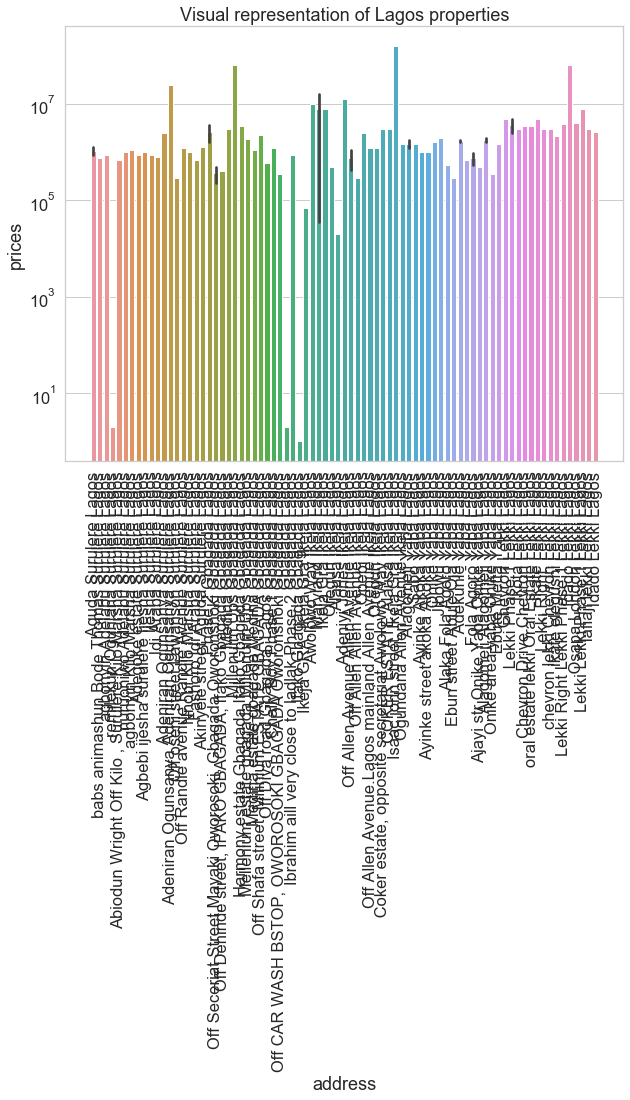

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
Lagos_property_datafig1 = sns.barplot(x="address", y="prices", data=Lagos_property_data)
plt.xticks(rotation='vertical')
Lagos_property_datafig1.plot(kind='bar', stacked=True)
Lagos_property_datafig1.set(yscale='log')
Lagos_property_datafig1.set(Title='Visual representation of Lagos properties')

[Text(0.5, 1.0, '     Visual representation of Lagos properties by property type')]

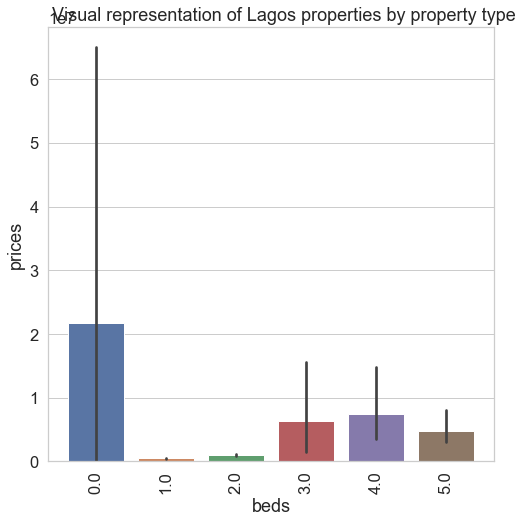

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,8))
Lagos_property_datafig2 = sns.barplot(x="beds", y="prices", data=Lagos_property_data)
plt.xticks(rotation='vertical')
Lagos_property_datafig2.plot(kind='bar', stacked=True)
#Lagos_property_datafig1.set(yscale='log')
Lagos_property_datafig2.set(Title='Visual representation of Lagos properties by property type')

[Text(0.5, 1.0, 'Visual representation of prices of Abuja properties')]

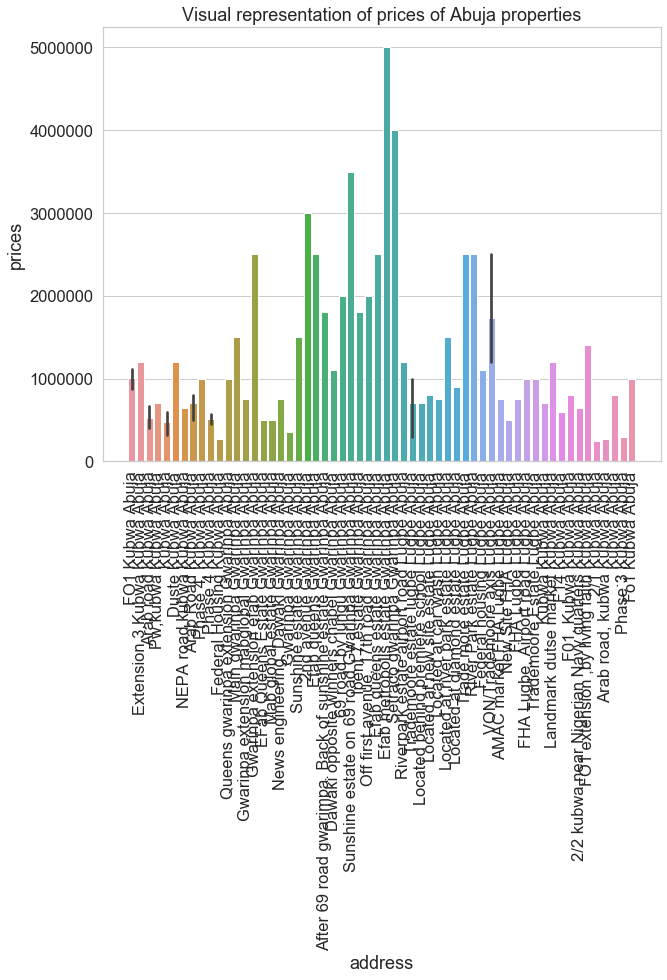

In [79]:
plt.figure(figsize=(10,8))
Abuja_property_datafig1 = sns.barplot(x="address", y="prices", data=Abuja_property_data)
plt.xticks(rotation='vertical')
Abuja_property_datafig1.plot(kind='bar', stacked=True)
#Abuja_property_datafig1.set(yscale='log')
Abuja_property_datafig1.set(Title='Visual representation of prices of Abuja properties')

[Text(0.5, 1.0, 'Visual representation of Abuja properties by property type')]

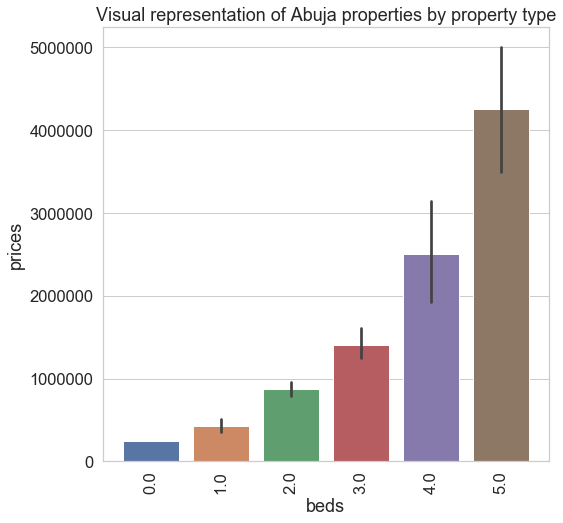

In [80]:
plt.figure(figsize=(8,8))
Abuja_property_datafig2 = sns.barplot(x="beds", y="prices", data=Abuja_property_data)
plt.xticks(rotation='vertical')
Abuja_property_datafig2.plot(kind='bar', stacked=True)
Abuja_property_datafig2.set(Title='Visual representation of Abuja properties by property type')

[Text(0.5, 1.0, 'Lagos and Abuja State Housing')]

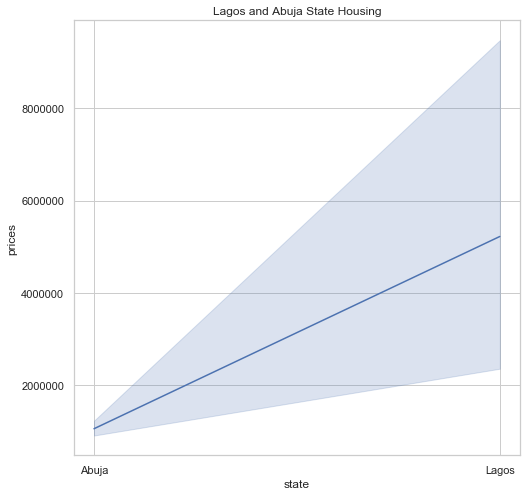

In [81]:
plt.figure(figsize=(8,8))
sns.set(style = "whitegrid")
LagosAbuja_property= pd.concat([Lagos_property_data,Abuja_property_data]).reset_index(drop=True)
#Abuja_property_data= pd.concat([Kubwa_properties3,Kubwa_properties2,Gwarinpa_properties,Lugbe_properties,Kubwa_properties1]).reset_index(drop=True)
LagosAbuja_property_datafig1 = sns.lineplot(x = "state", y= "prices", data= LagosAbuja_property)
LagosAbuja_property_datafig1.set(Title='Lagos and Abuja State Housing')

In [10]:
from scipy import stats
import numpy as np

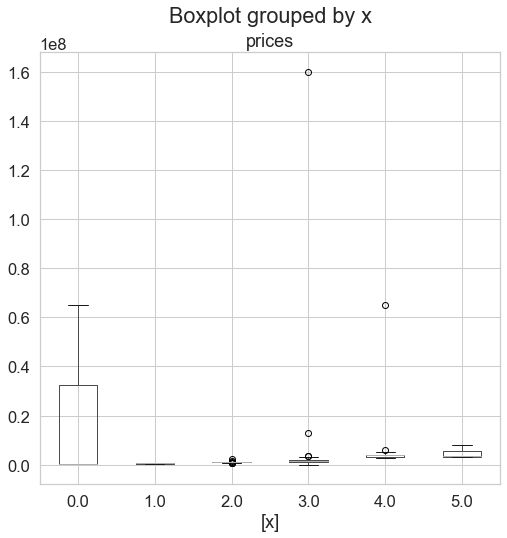

In [82]:
#show outliers for Lagos data
sns.set(rc={'figure.figsize':(8,8)},font_scale=1.5,style='whitegrid')
Lagos_datafig= pd.DataFrame(Lagos_property_data, columns=['prices'])
Lagos_datafig['x']= pd.DataFrame(Lagos_property_data, columns=['beds'])
Lagos_datafig.boxplot(by='x')
#title= 'boxplot of Lagos property data grouped by number of bedrooms'

In [12]:
#extract non outliers for 2bed
import numpy as np
lagos_property_price_2bed = Lagos_property_data[Lagos_property_data['beds'] == 2.0].reset_index()
Lagos_property_price_2bed = lagos_property_price_2bed.drop(columns=['index','Unnamed: 0'])
#print(Lagos_property_price_2bed)

In [13]:
Lagos2BedPrices= pd.DataFrame(Lagos_property_price_2bed, columns=['prices'])
z= np.abs(stats.zscore(Lagos2BedPrices))

#threshold=3
#print(np.where(z>=3))

#remove outliers
Lagos2bed_without_outlier = Lagos_property_price_2bed[(z<=3).all(axis=1)]
#print(Lagos2bed_without_outlier)

print(Lagos_property_price_2bed.shape)
print(Lagos2bed_without_outlier.shape)

(20, 7)
(19, 7)


In [15]:
Lagos2BedPrices.iloc[19]

prices    2200000
Name: 19, dtype: int64

In [16]:
#remove outliers for 3bed
lagos_property_price_3bed = Lagos_property_data[Lagos_property_data['beds'] == 3.0].reset_index()
Lagos_property_price_3bed = lagos_property_price_3bed.drop(columns=['index','Unnamed: 0'])
Lagos3BedPrices= pd.DataFrame(Lagos_property_price_3bed, columns=['prices'])
z= np.abs(stats.zscore(Lagos3BedPrices))

#threshold=3
#print(np.where(z>=3))

#remove outliers
Lagos3bed_without_outlier = Lagos_property_price_3bed[(z<=3).all(axis=1)]
#print(Lagos3bed_without_outlier)

print(Lagos_property_price_3bed.shape)
print(Lagos3bed_without_outlier.shape)

(36, 7)
(35, 7)


In [18]:
#remove outliers for 4bed
lagos_property_price_4bed = Lagos_property_data[Lagos_property_data['beds'] == 4.0].reset_index()
Lagos_property_price_4bed = lagos_property_price_4bed.drop(columns=['index','Unnamed: 0'])
Lagos4BedPrices= pd.DataFrame(Lagos_property_price_4bed, columns=['prices'])
z= np.abs(stats.zscore(Lagos4BedPrices))

#threshold=3
#print(np.where(z>=3))

#remove outliers
Lagos4bed_without_outlier = Lagos_property_price_4bed[(z<=3).all(axis=1)]
#print(Lagos4bed_without_outlier)

print(Lagos_property_price_4bed.shape)
print(Lagos4bed_without_outlier.shape)

(17, 7)
(16, 7)


In [19]:
lagos_property_price_1bed = Lagos_property_data[Lagos_property_data['beds'] == 1.0].reset_index()
Lagos_property_price_1bed  = lagos_property_price_1bed.drop(columns=['index','Unnamed: 0'])
#Lagos_property_price_1bed

In [21]:
lagos_property_price_5bed = Lagos_property_data[Lagos_property_data['beds'] == 5.0].reset_index()
Lagos_property_price_5bed  = lagos_property_price_5bed.drop(columns=['index','Unnamed: 0'])
#Lagos_property_price_5bed

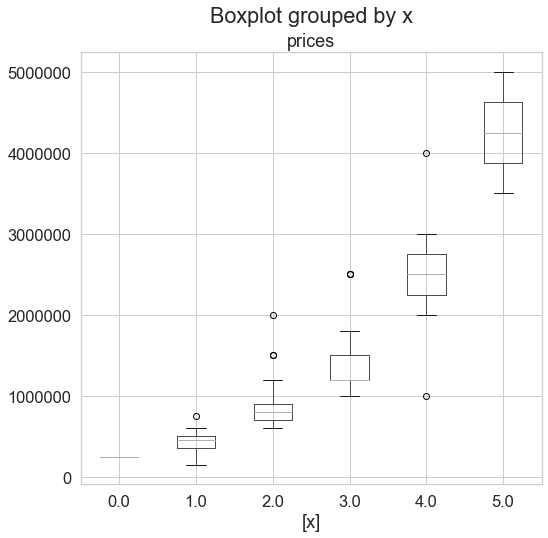

In [83]:
#show outliers for Abuja data
sns.set(rc={'figure.figsize':(8,8)},font_scale=1.5,style='whitegrid')
Abuja_datafig= pd.DataFrame(Abuja_property_data, columns=['prices'])
Abuja_datafig['x']= pd.DataFrame(Abuja_property_data, columns=['beds'])
Abuja_datafig.boxplot(by='x')

In [24]:
#extract non outliers for 1 bed
abuja_property_price_1bed = Abuja_property_data[Abuja_property_data['beds'] == 1.0].reset_index()
Abuja_property_price_1bed = abuja_property_price_1bed.drop(columns=['index','Unnamed: 0'])
#print(Abuja_property_price_1bed)

Abuja1BedPrices= pd.DataFrame(Abuja_property_price_1bed, columns=['prices'])
z= np.abs(stats.zscore(Abuja1BedPrices))

Abuja1bed_without_outlier = Abuja_property_price_1bed[(z<=3).all(axis=1)]
#print(Abuja1bed_without_outlier)

print(Abuja_property_price_1bed.shape)
print(Abuja1bed_without_outlier.shape)

(15, 7)
(15, 7)


In [25]:
#extract non outliers for 2 bed
abuja_property_price_2bed = Abuja_property_data[Abuja_property_data['beds'] == 2.0].reset_index()
Abuja_property_price_2bed = abuja_property_price_2bed.drop(columns=['index','Unnamed: 0'])
#print(Abuja_property_price_2bed)

Abuja2BedPrices= pd.DataFrame(Abuja_property_price_2bed, columns=['prices'])
z= np.abs(stats.zscore(Abuja2BedPrices))

Abuja2bed_without_outlier = Abuja_property_price_2bed[(z<=3).all(axis=1)]
#print(Abuja2bed_without_outlier)

print(Abuja_property_price_2bed.shape)
print(Abuja2bed_without_outlier.shape)

(40, 7)
(39, 7)


In [27]:
#extract non outliers for 3 bed
abuja_property_price_3bed = Abuja_property_data[Abuja_property_data['beds'] == 3.0].reset_index()
Abuja_property_price_3bed = abuja_property_price_3bed.drop(columns=['index','Unnamed: 0'])
#print(Abuja_property_price_3bed)

Abuja3BedPrices= pd.DataFrame(Abuja_property_price_3bed, columns=['prices'])
z= np.abs(stats.zscore(Abuja3BedPrices))

Abuja3bed_without_outlier = Abuja_property_price_3bed[(z<=3).all(axis=1)]
#print(Abuja3bed_without_outlier)

print(Abuja_property_price_3bed.shape)
print(Abuja3bed_without_outlier.shape)

(24, 7)
(24, 7)


In [28]:
#extract non outliers for 4 bed
abuja_property_price_4bed = Abuja_property_data[Abuja_property_data['beds'] == 4.0].reset_index()
Abuja_property_price_4bed = abuja_property_price_4bed.drop(columns=['index','Unnamed: 0'])
#print(Abuja_property_price_4bed)

Abuja4BedPrices= pd.DataFrame(Abuja_property_price_4bed, columns=['prices'])
z= np.abs(stats.zscore(Abuja4BedPrices))

Abuja4bed_without_outlier = Abuja_property_price_4bed[(z<=3).all(axis=1)]
#print(Abuja4bed_without_outlier)

print(Abuja_property_price_4bed.shape)
print(Abuja4bed_without_outlier.shape)

(7, 7)
(7, 7)


In [30]:
abuja_property_price_5bed = Abuja_property_data[Abuja_property_data['beds'] == 5.0].reset_index()
Abuja_property_price_5bed = abuja_property_price_5bed.drop(columns=['index','Unnamed: 0'])
print(Abuja_property_price_5bed)

   state                                            address currency   prices  \
0  Abuja  Sunshine estate on 69 road Gwarinpa Gwarinpa A...        ₦  3500000   
1  Abuja              Efab metropolis estate Gwarinpa Abuja        ₦  5000000   

   beds  baths  toilets  
0   5.0    5.0      6.0  
1   5.0    5.0      6.0  


In [31]:
Lagos2bed_without_outlier.describe()

,prices,beds,baths,toilets
count,1.900000e+01,19.0,19.000000,18.000000
mean,9.500000e+05,2.0,2.000000,2.388889
std,2.061553e+05,0.0,0.471405,0.697802
min,5.000000e+05,2.0,1.000000,1.000000
25%,9.000000e+05,2.0,2.000000,2.000000
50%,1.000000e+06,2.0,2.000000,2.500000
75%,1.000000e+06,2.0,2.000000,3.000000
max,1.500000e+06,2.0,3.000000,3.000000


In [32]:
Abuja2bed_without_outlier.describe()

,prices,beds,baths,toilets
count,3.900000e+01,39.0,39.000000,38.000000
mean,8.397436e+05,2.0,2.410256,2.842105
std,2.198024e+05,0.0,0.498310,0.369537
min,6.000000e+05,2.0,2.000000,2.000000
25%,7.000000e+05,2.0,2.000000,3.000000
50%,8.000000e+05,2.0,2.000000,3.000000
75%,9.000000e+05,2.0,3.000000,3.000000
max,1.500000e+06,2.0,3.000000,3.000000


In [34]:
Average_of_Abuja2beds = pd.pivot_table(data=Abuja2bed_without_outlier, values='prices', index=['beds'], aggfunc=np.mean)
Average_of_Lagos2beds = pd.pivot_table(data=Lagos2bed_without_outlier, values='prices', index=['beds'], aggfunc=np.mean)
print(Average_of_Abuja2beds)
print(Average_of_Lagos2beds)

             prices
beds               
2.0   839743.589744
      prices
beds        
2.0   950000


In [36]:
Lagos_property_price_1bed.describe()

,prices,beds,baths,toilets
count,10.000000,10.0,9.000000,9.000000
mean,485000.000000,1.0,1.333333,1.444444
std,129206.982955,0.0,0.500000,0.527046
min,300000.000000,1.0,1.000000,1.000000
25%,362500.000000,1.0,1.000000,1.000000
50%,525000.000000,1.0,1.000000,1.000000
75%,550000.000000,1.0,2.000000,2.000000
max,700000.000000,1.0,2.000000,2.000000


In [37]:
Abuja1bed_without_outlier.describe()

,prices,beds,baths,toilets
count,15.000000,15.0,15.000000,15.000000
mean,431333.333333,1.0,1.133333,1.333333
std,159725.955788,0.0,0.351866,0.487950
min,150000.000000,1.0,1.000000,1.000000
25%,350000.000000,1.0,1.000000,1.000000
50%,450000.000000,1.0,1.000000,1.000000
75%,500000.000000,1.0,1.000000,2.000000
max,750000.000000,1.0,2.000000,2.000000


In [38]:
Average_of_Abuja1beds = pd.pivot_table(data=Abuja1bed_without_outlier, values='prices', index=['beds'], aggfunc=np.mean)
Average_of_Lagos1beds = pd.pivot_table(data=Lagos_property_price_1bed, values='prices', index=['beds'], aggfunc=np.mean)
print(Average_of_Abuja1beds)
print(Average_of_Lagos1beds)

             prices
beds               
1.0   431333.333333
      prices
beds        
1.0   485000


In [39]:
Lagos3bed_without_outlier.describe()

,prices,beds,baths,toilets
count,3.500000e+01,35.0,33.000000,33.000000
mean,1.930000e+06,3.0,2.818182,3.515152
std,2.104973e+06,0.0,0.464660,0.667140
min,1.000000e+00,3.0,2.000000,2.000000
25%,1.200000e+06,3.0,3.000000,3.000000
50%,1.600000e+06,3.0,3.000000,4.000000
75%,2.000000e+06,3.0,3.000000,4.000000
max,1.300000e+07,3.0,4.000000,4.000000


In [40]:
Abuja3bed_without_outlier.describe()

,prices,beds,baths,toilets
count,2.400000e+01,24.0,24.000000,24.0
mean,1.408333e+06,3.0,3.291667,4.0
std,4.726582e+05,0.0,0.464306,0.0
min,1.000000e+06,3.0,3.000000,4.0
25%,1.200000e+06,3.0,3.000000,4.0
50%,1.200000e+06,3.0,3.000000,4.0
75%,1.500000e+06,3.0,4.000000,4.0
max,2.500000e+06,3.0,4.000000,4.0


In [42]:
pd.pivot_table(data=Abuja_property_data, values='prices', index=['beds'], aggfunc=np.mean, fill_value=0)

,prices
beds,
0.0,2.500000e+05
1.0,4.313333e+05
2.0,8.687500e+05
3.0,1.408333e+06
4.0,2.500000e+06
5.0,4.250000e+06


In [43]:
Average_of_Abuja3beds = pd.pivot_table(data=Abuja3bed_without_outlier, values='prices', index=['beds'], aggfunc=np.mean)
Average_of_Lagos3beds = pd.pivot_table(data=Lagos3bed_without_outlier, values='prices', index=['beds'], aggfunc=np.mean)
print(Average_of_Abuja3beds)
print(Average_of_Lagos3beds)

            prices
beds              
3.0   1.408333e+06
            prices
beds              
3.0   1.930000e+06


In [44]:
Lagos4bed_without_outlier.describe()

,prices,beds,baths,toilets
count,1.600000e+01,16.0,15.0,15.000000
mean,3.837500e+06,4.0,4.0,4.933333
std,8.973108e+05,0.0,0.0,0.258199
min,2.600000e+06,4.0,4.0,4.000000
25%,3.000000e+06,4.0,4.0,5.000000
50%,3.900000e+06,4.0,4.0,5.000000
75%,4.000000e+06,4.0,4.0,5.000000
max,6.000000e+06,4.0,4.0,5.000000


In [45]:
Abuja4bed_without_outlier.describe()

,prices,beds,baths,toilets
count,7.000000e+00,7.0,7.000000,7.0
mean,2.500000e+06,4.0,4.285714,5.0
std,9.128709e+05,0.0,0.487950,0.0
min,1.000000e+06,4.0,4.000000,5.0
25%,2.250000e+06,4.0,4.000000,5.0
50%,2.500000e+06,4.0,4.000000,5.0
75%,2.750000e+06,4.0,4.500000,5.0
max,4.000000e+06,4.0,5.000000,5.0


In [47]:
Average_of_Abuja4beds = pd.pivot_table(data=Abuja4bed_without_outlier, values='prices', index=['beds'], aggfunc=np.mean)
Average_of_Lagos4beds = pd.pivot_table(data=Lagos4bed_without_outlier, values='prices', index=['beds'], aggfunc=np.mean)
print(Average_of_Abuja4beds)
print(Average_of_Lagos4beds)

       prices
beds         
4.0   2500000
       prices
beds         
4.0   3837500


In [48]:
Lagos_property_price_5bed.describe()

,prices,beds,baths,toilets
count,3.000000e+00,3.0,2.0,2.0
mean,4.833333e+06,5.0,5.0,6.0
std,2.753785e+06,0.0,0.0,0.0
min,3.000000e+06,5.0,5.0,6.0
25%,3.250000e+06,5.0,5.0,6.0
50%,3.500000e+06,5.0,5.0,6.0
75%,5.750000e+06,5.0,5.0,6.0
max,8.000000e+06,5.0,5.0,6.0


In [49]:
Abuja_property_price_5bed.describe()

,prices,beds,baths,toilets
count,2.000000e+00,2.0,2.0,2.0
mean,4.250000e+06,5.0,5.0,6.0
std,1.060660e+06,0.0,0.0,0.0
min,3.500000e+06,5.0,5.0,6.0
25%,3.875000e+06,5.0,5.0,6.0
50%,4.250000e+06,5.0,5.0,6.0
75%,4.625000e+06,5.0,5.0,6.0
max,5.000000e+06,5.0,5.0,6.0


In [50]:
Average_of_Abuja5beds = pd.pivot_table(data=Abuja_property_price_5bed, values='prices', index=['beds'], aggfunc=np.mean)
Average_of_Lagos5beds = pd.pivot_table(data=Lagos_property_price_5bed, values='prices', index=['beds'], aggfunc=np.mean)
print(Average_of_Abuja5beds)
print(Average_of_Lagos5beds)

       prices
beds         
5.0   4250000
            prices
beds              
5.0   4.833333e+06


In [65]:
#plt.plot(Average_of_Abuja2beds, color = "red")
#plt.plot(Average_of_Lagos2beds, color = "blue")
#plt.show()
#plt.figure(figsize=(30,15))
import pandas as pd
All_Abuja_beds_average= pd.concat([Average_of_Abuja1beds, Average_of_Abuja2beds,Average_of_Abuja3beds,Average_of_Abuja4beds,Average_of_Abuja5beds])
#print(All_Abuja_beds_average.to_records())
All_Lagos_beds_average= pd.concat([Average_of_Lagos1beds, Average_of_Lagos2beds,Average_of_Lagos3beds,Average_of_Lagos4beds,Average_of_Lagos5beds])
#print(All_Lagos_beds_average.to_records())

abuja_avg_df = pd.DataFrame(All_Abuja_beds_average.to_records())
lagos_avg_df = pd.DataFrame(All_Lagos_beds_average.to_records())

print(lagos_avg_df)

#All_beds_averagefig1 = sns.scatterplot
#plt.xticks(rotation='vertical')
#Abuja_property_datafig1.plot(kind='bar', stacked=True)
#Abuja_property_datafig1.set(yscale='log')
#Abuja_property_datafig1.set(Title='Visual representation of Abuja properties by prices')
#All_beds_average= pd.concat([])

   beds        prices
0   1.0  4.850000e+05
1   2.0  9.500000e+05
2   3.0  1.930000e+06
3   4.0  3.837500e+06
4   5.0  4.833333e+06


<Figure size 720x576 with 0 Axes>

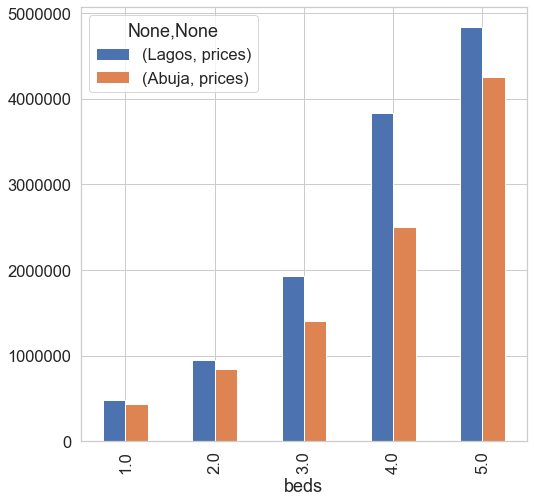

In [84]:
plt.figure(figsize=(10,8))
#Abuja_property_datafig1 = sns.barplot(x="beds", y="prices", data=abuja_avg_df)
#plt.xticks(rotation='vertical')
#Abuja_property_datafig1.plot(kind='bar', stacked=True)
#Abuja_property_datafig1.set(yscale='log')
#Abuja_property_datafig1.set(Title='Average Price of Abuja properties')

pd.concat({
    'Lagos': lagos_avg_df.set_index('beds'), 'Abuja': abuja_avg_df.set_index('beds')
}, axis=1).plot.bar()